<a href="https://colab.research.google.com/github/baradmukta/Regression-Capstone-Project---2/blob/main/regression_capstone_project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b> Project Title : Seoul Bike Sharing Demand Prediction </b>

**Index:**
1. Problem statement
2. Importing the libraries and the dataset
3. Understand the data
4. Data cleaning
5. Exploratory data analysis
6. Feature selection
7. Data preprocessing
8. ML model implementation
9. Results
10. Model Explainability
11. Summary and conclusions

###**Github Link:**

https://github.com/baradmukta/Regression-Capstone-Project---2



# **1. Problem Statement:**


**Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.**

### <b> Data Description </b>

##### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ##### Date : year-month-day
* ##### Rented Bike count - Count of bikes rented at each hour
* ##### Hour - Hour of the day
* ##### Temperature-Temperature in Celsius
* ##### Humidity - %
* ##### Windspeed - m/s
* ##### Visibility - 10m
* ##### Dew point temperature - Celsius
* ##### Solar radiation - MJ/m2
* ##### Rainfall - mm
* ##### Snowfall - cm
* ##### Seasons - Winter, Spring, Summer, Autumn
* ##### Holiday - Holiday/No holiday
* ##### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

# **2. Importing the libraries and the dataset**

In [ ]:
#let's import the modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from datetime import datetime
import datetime as dt

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MultiLabelBinarizer

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error

import warnings
warnings.filterwarnings('ignore')

##Mount the drive and import the datset

In [ ]:
#let's mount the google drive for import the dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#load and read the seol bike data set from drive
bike_df = pd.read_csv('/content/drive/MyDrive/SeoulBikeData.csv',encoding='latin')
bike_df.head()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0  01/12/2017                254     0             -5.2           37   
1  01/12/2017                204     1             -5.5           38   
2  01/12/2017                173     2             -6.0           39   
3  01/12/2017                107     3             -6.2           40   
4  01/12/2017                 78     4             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   
1                      0.0           0.0            0.0  Winter  No Holiday   
2                      0.0           0.0            0.0  Winter  No Holiday   
3                      0.0           0.0            0.0  Winter  No Holiday   
4                      0.0           0.0            0.0  Winter  No Holiday   

  Functioning Day  
0             Yes  
1             Yes  
2             Yes  
3             Yes  
4             Yes

#**3. Understand the data**

In [ ]:
#Getting the shape of dataset with rows and columns
print(bike_df.shape)

(8760, 14)


In [ ]:
#Getting all the columns
print("Features of the dataset:")
bike_df.columns

Features of the dataset:


Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [ ]:
#check details about the data set
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [ ]:
#print the unique value
bike_df.nunique()

Date                          365
Rented Bike Count            2166
Hour                           24
Temperature(°C)               546
Humidity(%)                    90
Wind speed (m/s)               65
Visibility (10m)             1789
Dew point temperature(°C)     556
Solar Radiation (MJ/m2)       345
Rainfall(mm)                   61
Snowfall (cm)                  51
Seasons                         4
Holiday                         2
Functioning Day                 2
dtype: int64

In [ ]:
# checking the null value counts
print(bike_df.isnull().sum())

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64


**Why do we need to handle missing values?**
* *The real-world data often has a lot of missing values. the cause of missing values can be data corruption or failure to record data. The handling of missing data is very important during the preprocessing of the dataset as many machine learning algorithms do not support missing values.that's why we check missing values first.*
* *As we can see above there are no missing value presents thankfully.* 

In [ ]:
# Checking Duplicate Values
value=len(bike_df[bike_df.duplicated()])
print("The number of duplicate values in the data set is = ",value)

The number of duplicate values in the data set is =  0


**Why is it important to remove duplicate records from my data?** 
* **"Duplication"** just means that you have repeated data in your dataset. This **could be due to things like data entry errors or data collection methods**. by removing duplication in our data set,  Time and money are saved by not sending identical communications multiple times to the same person.
* In the above data after count the missing and duplicate value we came to know that there are no missing and duplicate value present.

In [ ]:
#Looking for the description of the dataset to get insights of the data
bike_df.describe().astype(int).T

count  mean  std  min  25%   50%   75%   max
Rented Bike Count           8760   704  644    0  191   504  1065  3556
Hour                        8760    11    6    0    5    11    17    23
Temperature(°C)             8760    12   11  -17    3    13    22    39
Humidity(%)                 8760    58   20    0   42    57    74    98
Wind speed (m/s)            8760     1    1    0    0     1     2     7
Visibility (10m)            8760  1436  608   27  940  1698  2000  2000
Dew point temperature(°C)   8760     4   13  -30   -4     5    14    27
Solar Radiation (MJ/m2)     8760     0    0    0    0     0     0     3
Rainfall(mm)                8760     0    1    0    0     0     0    35
Snowfall (cm)               8760     0    0    0    0     0     0     8

* This Dataset contains **8760 lines** and **14 columns**.
* In a day we have **24 hours** and we have **365 days** a year so  **365*24 = 8760**, which represents the number of line in the dataset.means we have the data of whole year. 

##Features description

**Breakdown of Our Features:**

**Date** : *The date of the day, during 365 days from 01/12/2017 to 30/11/2018, formating in DD/MM/YYYY, type : str*, we need to convert into datetime format.

**Rented Bike Count** : *Number of rented bikes per hour which our dependent variable and we need to predict that, type : int*

**Hour**: *The hour of the day, starting from 0-23 it's in a digital time format, type : int, we need to convert it into category data type.*

**Temperature(°C)**: *Temperature in Celsius, type : Float*

**Humidity(%)**: *Humidity in the air in %, type : int*

**Wind speed (m/s)** : *Speed of the wind in m/s, type : Float*

**Visibility (10m)**: *Visibility in m, type : int*

**Dew point temperature(°C)**: *Temperature at the beggining of the day, type : Float*

**Solar Radiation (MJ/m2)**: *Sun contribution, type : Float*

**Rainfall(mm)**: *Amount of raining in mm, type : Float*

**Snowfall (cm)**: *Amount of snowing in cm, type : Float*

**Seasons**: *Season of the year, type : str, there are only 4 season's in data *. 

**Holiday**: *If the day  is holiday period or not, type: str*

**Functioning Day**: *If the day is a Functioning Day or not, type : str*


In [ ]:
#Rename the complex columns name
bike_df=bike_df.rename(columns={'Rented Bike Count':'Rented_Bike_Count',
                                'Temperature(°C)':'Temperature',
                                'Humidity(%)':'Humidity',
                                'Wind speed (m/s)':'Wind_speed',
                                'Visibility (10m)':'Visibility',
                                'Dew point temperature(°C)':'Dew_point_temperature',
                                'Solar Radiation (MJ/m2)':'Solar_Radiation',
                                'Rainfall(mm)':'Rainfall',
                                'Snowfall (cm)':'Snowfall',
                                'Functioning Day':'Functioning_Day'})

##Breaking date column
* Spliting Date column which is in string format into year, month, day as a category data type.

In [ ]:

# Changing the "Date" column into three "year","month","day" column
bike_df['Date'] = bike_df['Date'].apply(lambda x: 
                                    dt.datetime.strptime(x,"%d/%m/%Y"))
bike_df['year'] = bike_df['Date'].dt.year
bike_df['month'] = bike_df['Date'].dt.month
bike_df['day'] = bike_df['Date'].dt.day_name()


In [ ]:
#Observing the pattern of data
bike_df.iloc[30:35,:]

Date  Rented_Bike_Count  Hour  Temperature  Humidity  Wind_speed  \
30 2017-12-02                 70     6         -4.3        82         2.1   
31 2017-12-02                146     7         -4.4        81         2.5   
32 2017-12-02                219     8         -4.2        79         2.1   
33 2017-12-02                328     9         -2.9        68         1.6   
34 2017-12-02                334    10         -0.4        57         1.6   

    Visibility  Dew_point_temperature  Solar_Radiation  Rainfall  Snowfall  \
30        1178                   -6.9             0.00       0.0       0.0   
31        1276                   -7.1             0.00       0.0       0.0   
32        1436                   -7.3             0.01       0.0       0.0   
33        1487                   -7.9             0.30       0.0       0.0   
34        1309                   -7.8             0.80       0.0       0.0   

   Seasons     Holiday Functioning_Day  year  month       day  
30  Winter  No Holiday             Yes  2017     12  Saturday  
31  Winter  No Holiday             Yes  2017     12  Saturday  
32  Winter  No Holiday             Yes  2017     12  Saturday  
33  Winter  No Holiday             Yes  2017     12  Saturday  
34  Winter  No Holiday             Yes  2017     12  Saturday

In [ ]:

#creating a new column of "weekdays_weekend" and drop the column "Date","day","year"
bike_df['weekdays_weekend']=bike_df['day'].apply(lambda x : 1 if x=='Saturday' or x=='Sunday' else 0 )
bike_df=bike_df.drop(columns=['Date','day','year'],axis=1)

In [ ]:
bike_df.head()

Rented_Bike_Count  Hour  Temperature  Humidity  Wind_speed  Visibility  \
0                254     0         -5.2        37         2.2        2000   
1                204     1         -5.5        38         0.8        2000   
2                173     2         -6.0        39         1.0        2000   
3                107     3         -6.2        40         0.9        2000   
4                 78     4         -6.0        36         2.3        2000   

   Dew_point_temperature  Solar_Radiation  Rainfall  Snowfall Seasons  \
0                  -17.6              0.0       0.0       0.0  Winter   
1                  -17.6              0.0       0.0       0.0  Winter   
2                  -17.7              0.0       0.0       0.0  Winter   
3                  -17.6              0.0       0.0       0.0  Winter   
4                  -18.6              0.0       0.0       0.0  Winter   

      Holiday Functioning_Day  month  weekdays_weekend  
0  No Holiday             Yes     12                 0  
1  No Holiday             Yes     12                 0  
2  No Holiday             Yes     12                 0  
3  No Holiday             Yes     12                 0  
4  No Holiday             Yes     12                 0

In [ ]:
bike_df['weekdays_weekend'].value_counts()

0    6264
1    2496
Name: weekdays_weekend, dtype: int64

In [ ]:
bike_df['Functioning_Day'].value_counts()

Yes    8465
No      295
Name: Functioning_Day, dtype: int64

* So we convert the "date" column into 3 different column i.e "year","month","day".
* The "year" column is basically contain **from 2017 december to 2018 november i.e. one year** **we don't need the "year" column so we drop it**. 
* The other column "day", it contains the each day of the month,we don't need each day of each month data but we need the data about, **if a day is a weekday or a weekend** so we convert it into this format and **drop the "day" column**.

###**Changing data type**

In [ ]:
#Change the int64 column into catagory column
cols=['Hour','month','weekdays_weekend']
for i in cols:
  bike_df[i]=bike_df[i].astype('category')

#**5. Exploratory data analysis**

## **Univariate Analysis**
* ***The key objective of Univariate analysis is to simply describe the data to find patterns within the data.*** 
* ***we analyse our dependent variable,A dependent variable is a variable whose value will change depending on the value of another variable.***
* ***Our dependent variable is "Rented Bike Count" so we need to analyse this column with the other columns by using some visualisation plot.first we analyze the category data type then we proceed with the numerical data type***

####**Analysis of Categorical data by visualization**
* ***Month***      
* ***weekdays_weekend***
* ***Hour***
* ***Functioning Day***
* ***Season***
* ***Holiday*** 


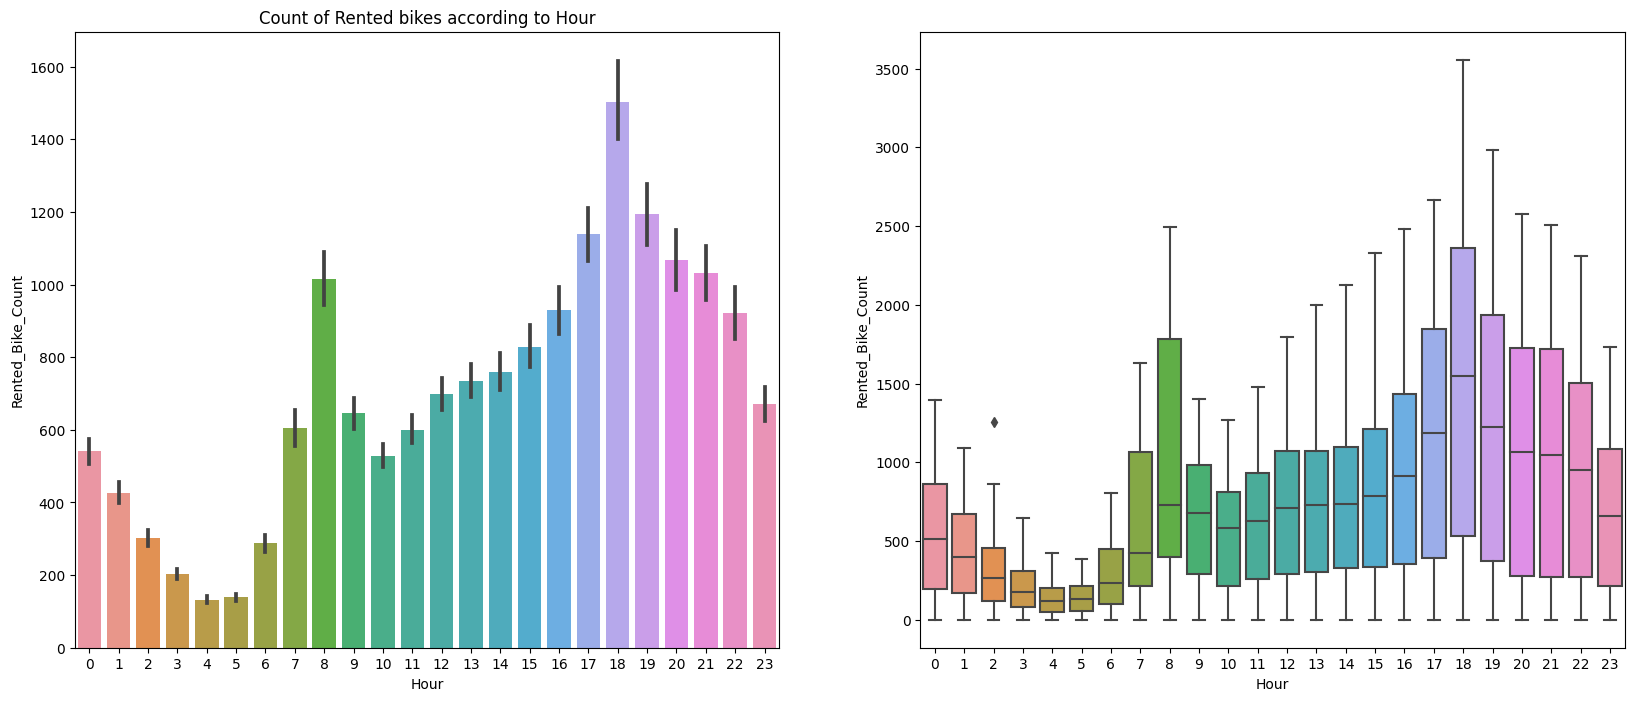

In [ ]:
#Visualization by Hour category
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Count of Rented bikes according to Hour')
sns.barplot(data=bike_df,x='Hour',y='Rented_Bike_Count');

plt.subplot(1,2,2)
sns.boxplot(data=bike_df,x='Hour',y='Rented_Bike_Count');

* ***In the above plot which shows the use of rented bike according the hours and the data are from all over the year.***

* ***generally people use rented bikes during their working hour from 7am to 9am and 5pm to 9pm.***   

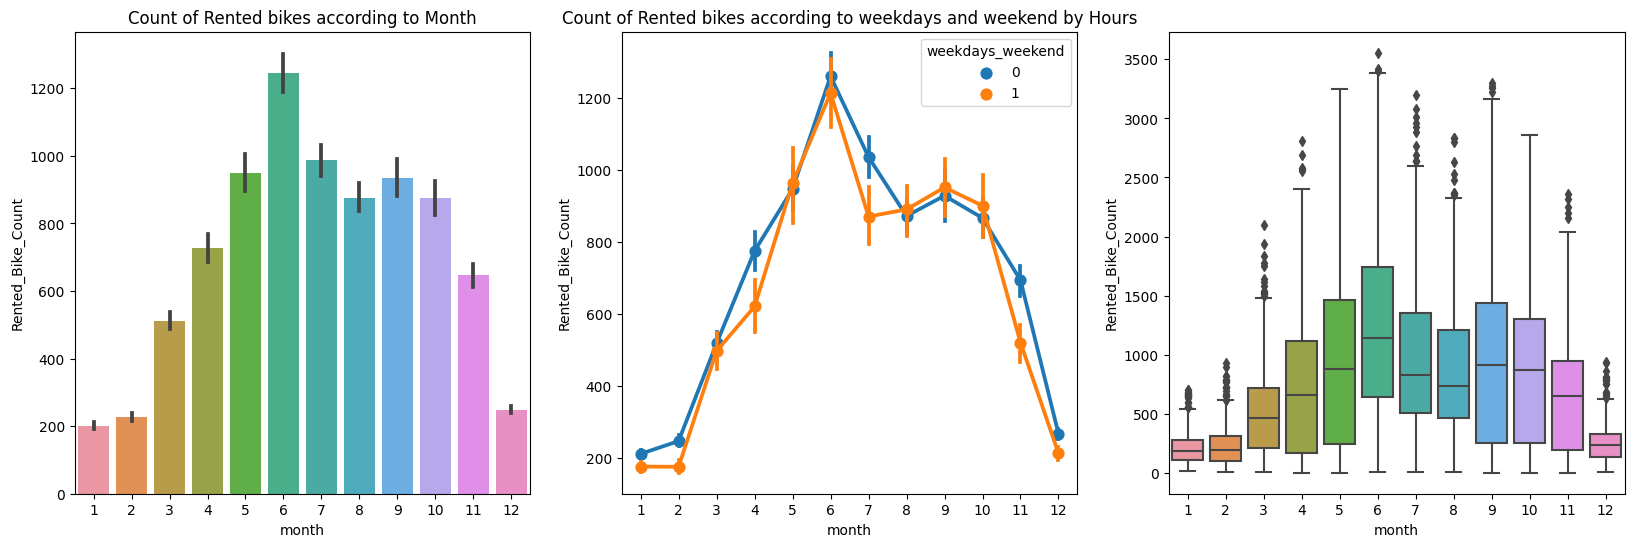

In [ ]:
#Visualization by Month category
plt.figure(figsize=(20,6))

plt.subplot(1,3,1)
plt.title('Count of Rented bikes according to Month')
sns.barplot(data=bike_df,x='month',y='Rented_Bike_Count');

plt.subplot(1,3,2)
plt.title('Count of Rented bikes according to weekdays and weekend by Hours')
sns.pointplot(data=bike_df,x='month',y='Rented_Bike_Count',hue='weekdays_weekend');

plt.subplot(1,3,3)
sns.boxplot(data=bike_df,x='month',y='Rented_Bike_Count');

* ***From the above bar plot we can clearly say that, the demand of the rented bike is high in May, June, July, August, September as compare to other months.these months are comes inside the summer season.***

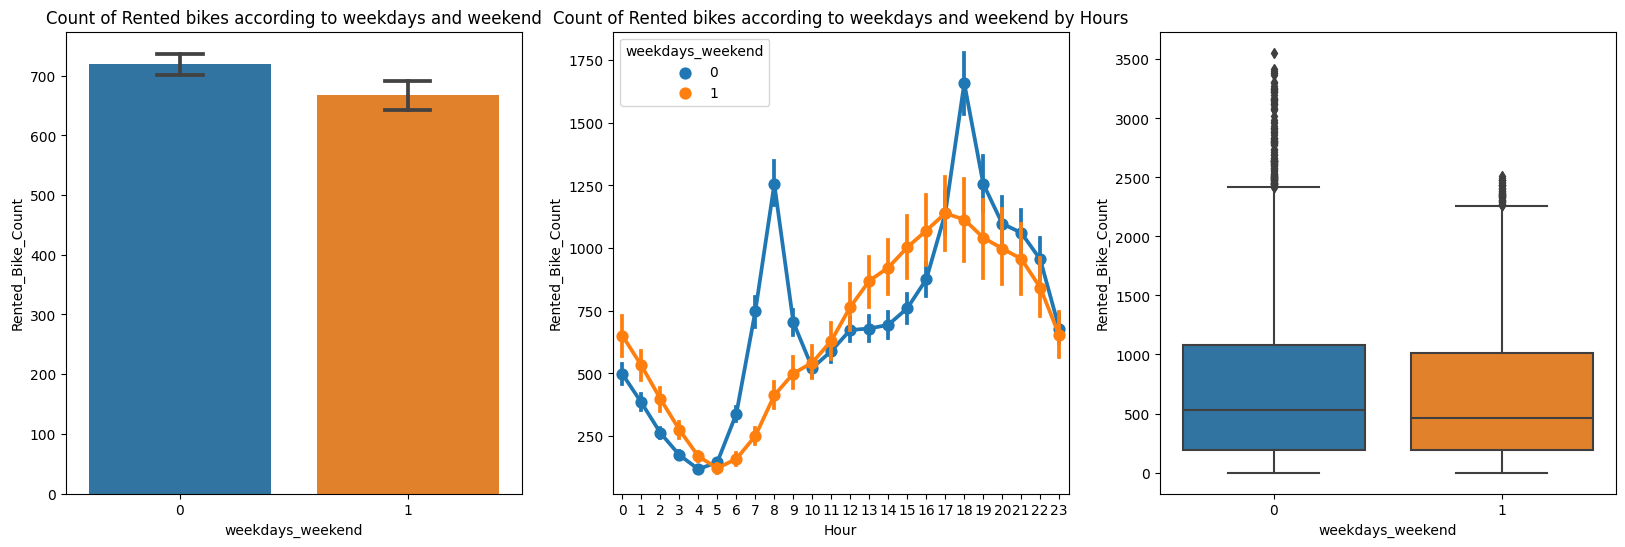

In [ ]:
#Visualization by weekdays and weekend category
plt.figure(figsize=(20,6))

plt.subplot(1,3,1)
plt.title('Count of Rented bikes according to weekdays and weekend')
sns.barplot(data=bike_df,x='weekdays_weekend',y='Rented_Bike_Count',capsize=.2);

plt.subplot(1,3,2)
plt.title('Count of Rented bikes according to weekdays and weekend by Hours')
sns.pointplot(data=bike_df,x='Hour',y='Rented_Bike_Count',hue='weekdays_weekend');

plt.subplot(1,3,3)
sns.boxplot(data=bike_df,x='weekdays_weekend',y='Rented_Bike_Count');

* ***From the above point plot and bar plot we can say that in the week days which represent in blue colur show that the demand of the bike higher because of the office.***
***Peak Time are 7 am to 9 am and 5 pm to 9 pm on weekdays for rented bikes**
***The orange colur represent the weekend days, and it show that the demand of rented bikes are very low specially in the morning hour but from 4 pm to 8 pm the demand slightly increases.** 

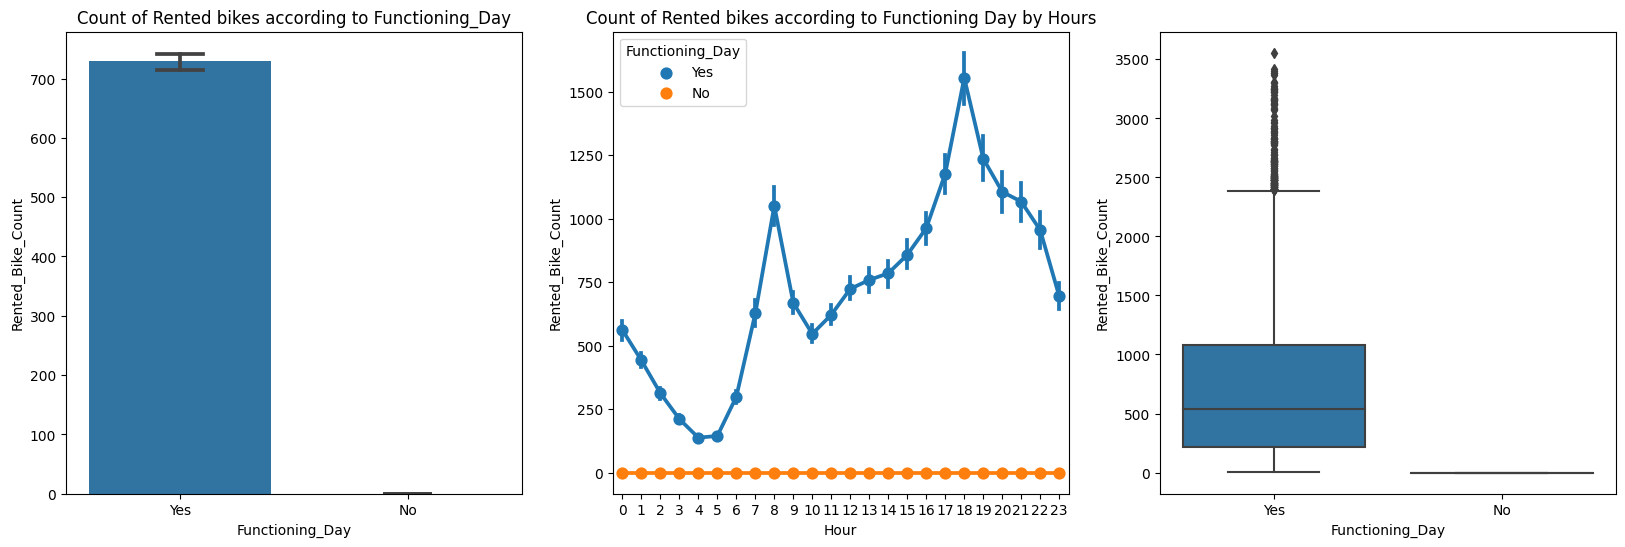

In [ ]:
#Visualization by Functioning Day category
plt.figure(figsize=(20,6))

plt.subplot(1,3,1)
plt.title('Count of Rented bikes according to Functioning_Day')
sns.barplot(data=bike_df,x='Functioning_Day',y='Rented_Bike_Count',capsize=.2);

plt.subplot(1,3,2)
plt.title('Count of Rented bikes according to Functioning Day by Hours')
sns.pointplot(data=bike_df,x='Hour',y='Rented_Bike_Count',hue='Functioning_Day');

plt.subplot(1,3,3)
sns.boxplot(data=bike_df,x='Functioning_Day',y='Rented_Bike_Count');

* ***In the above bar plot and point plot which shows the use of rented bike in functioning days or not, and it clearly shows that,***
* ***Peoples use rented bikes mostly on functioning day.***

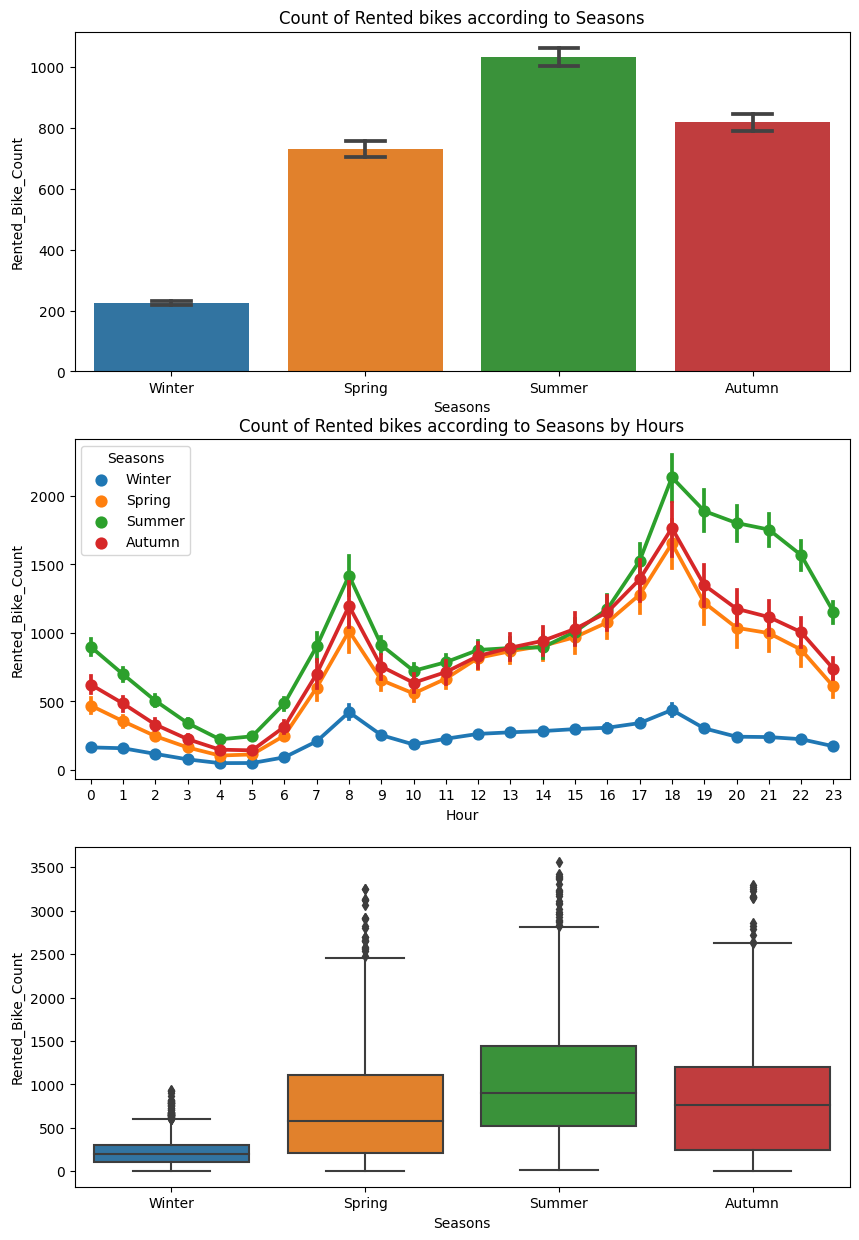

In [ ]:
#Visualization by Season category
plt.figure(figsize=(10,15))

plt.subplot(3,1,1)
plt.title('Count of Rented bikes according to Seasons')
sns.barplot(data=bike_df,x='Seasons',y='Rented_Bike_Count',capsize=.2);

plt.subplot(3,1,2)
plt.title('Count of Rented bikes according to Seasons by Hours')
sns.pointplot(data=bike_df,x='Hour',y='Rented_Bike_Count',hue='Seasons');

plt.subplot(3,1,3)
sns.boxplot(data=bike_df,x='Seasons',y='Rented_Bike_Count');

* ***In the above bar plot and point plot which shows the use of rented bike in in four different seasons, and it clearly shows that,***
* ***In summer season the use of rented bike is high and peak time is 7am-9am and 5pm-9pm.***
* ***In winter season the use of rented bike is very low because of snowfall.***
* ***graph of Spring, Summer, Autumn Season showing similar trend in rented bikes***

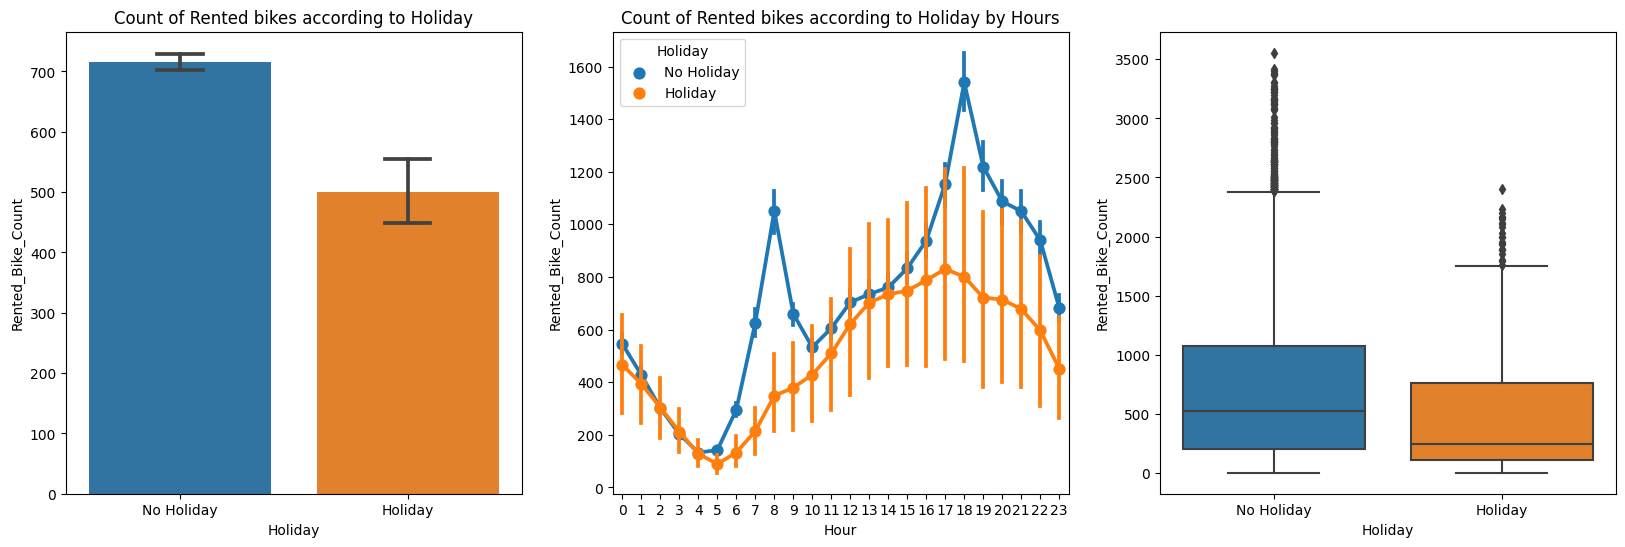

In [ ]:
#Visualization by Holiday category
plt.figure(figsize=(20,6))

plt.subplot(1,3,1)
plt.title('Count of Rented bikes according to Holiday')
sns.barplot(data=bike_df,x='Holiday',y='Rented_Bike_Count',capsize=.2);

plt.subplot(1,3,2)
plt.title('Count of Rented bikes according to Holiday by Hours')
sns.pointplot(data=bike_df,x='Hour',y='Rented_Bike_Count',hue='Holiday');

plt.subplot(1,3,3)
sns.boxplot(data=bike_df,x='Holiday',y='Rented_Bike_Count');

* ***In the above bar plot and point plot which shows the use of rented bike is highest when there is no holiday***
* ***plot shows that in holiday people uses the rented bike from 2pm-8pm***

####**Analysis of Numerical data by visualization**
* ***Numerical data is a data type expressed in numbers, rather than natural language description. Sometimes called quantitative data, numerical data is always collected in number form. Numerical data differentiates itself from other number form data types with its ability to carry out arithmetic operations with these numbers.***

In [ ]:

numerical_columns = bike_df.select_dtypes(['int64','float64']).columns
numerical_features=pd.Index(numerical_columns)
numerical_features

Index(['Rented_Bike_Count', 'Temperature', 'Humidity', 'Wind_speed',
       'Visibility', 'Dew_point_temperature', 'Solar_Radiation', 'Rainfall',
       'Snowfall'],
      dtype='object')

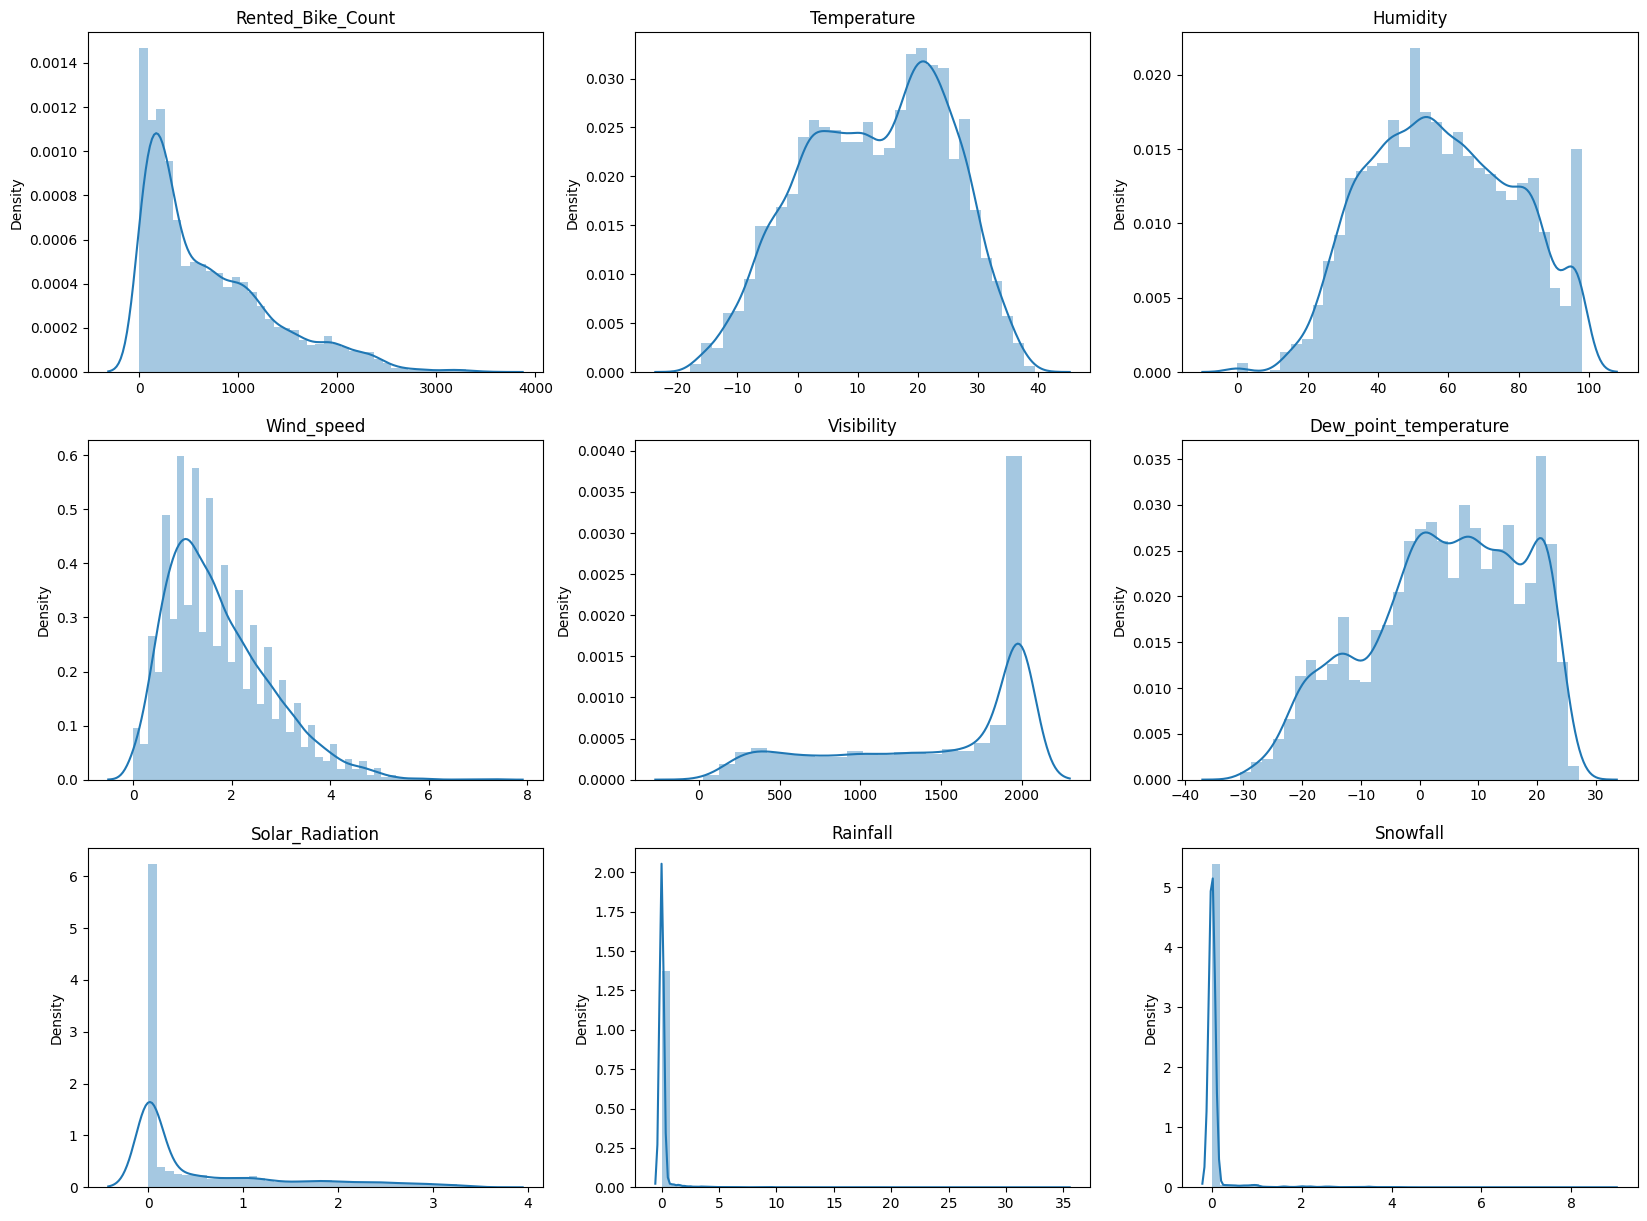

In [ ]:
#printing plot for checking distribution and skewness
plt.figure(figsize=(20,15))

plt.subplot(3,3,1)
plt.title('Rented_Bike_Count')
sns.distplot(x=bike_df['Rented_Bike_Count'],kde=True);

plt.subplot(3,3,2)
plt.title('Temperature')
sns.distplot(x=bike_df['Temperature'],kde=True);

plt.subplot(3,3,3)
plt.title('Humidity')
sns.distplot(x=bike_df['Humidity'],kde=True);

plt.subplot(3,3,4)
plt.title('Wind_speed')
sns.distplot(x=bike_df['Wind_speed'],kde=True);

plt.subplot(3,3,5)
plt.title('Visibility')
sns.distplot(x=bike_df['Visibility'],kde=True);

plt.subplot(3,3,6)
plt.title('Dew_point_temperature')
sns.distplot(x=bike_df['Dew_point_temperature'],kde=True);

plt.subplot(3,3,7)
plt.title('Solar_Radiation')
sns.distplot(x=bike_df['Solar_Radiation'],kde=True);

plt.subplot(3,3,8)
plt.title('Rainfall')
sns.distplot(x=bike_df['Rainfall'],kde=True);

plt.subplot(3,3,9)
plt.title('Snowfall')
sns.distplot(x=bike_df['Snowfall'],kde=True);

###**Numerical vs rented_bike_count**

In [ ]:
#printing plot to analyse relationship between rented bike count and other numerical features
numerical_col= bike_df.select_dtypes(['int64','float64']).columns.drop(['Rented_Bike_Count'])
numerical_features1 = pd.Index(numerical_col)
numerical_features1

Index(['Temperature', 'Humidity', 'Wind_speed', 'Visibility',
       'Dew_point_temperature', 'Solar_Radiation', 'Rainfall', 'Snowfall'],
      dtype='object')

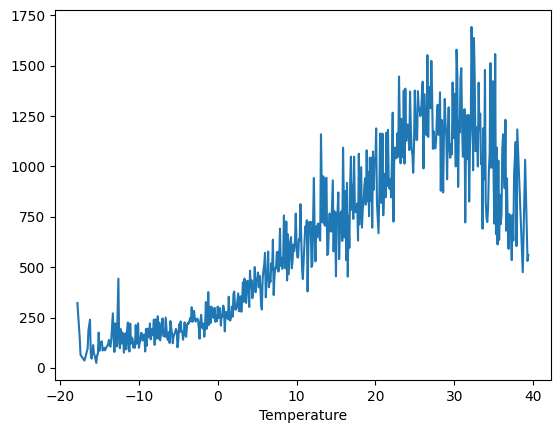

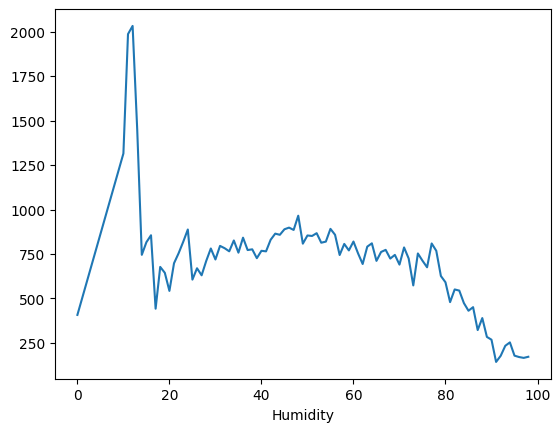

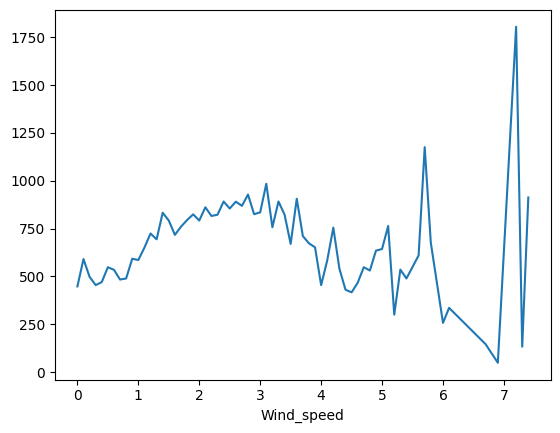

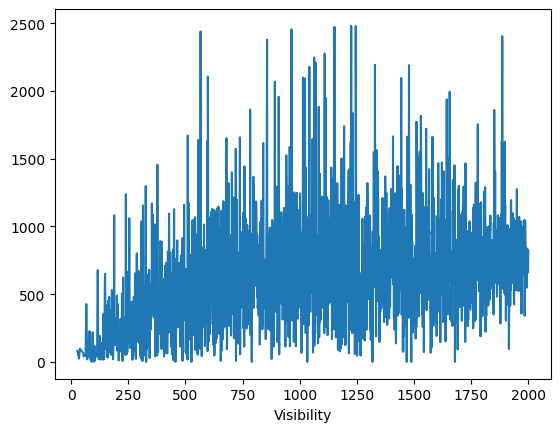

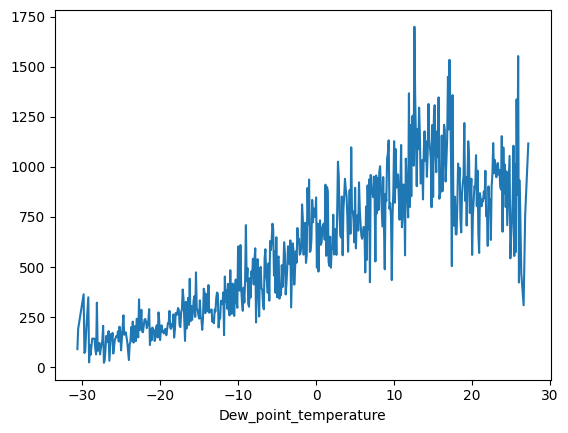

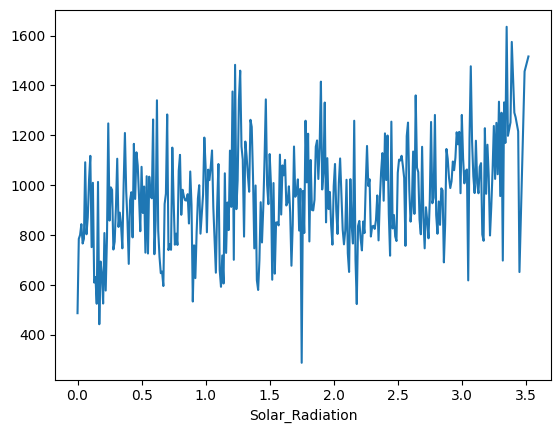

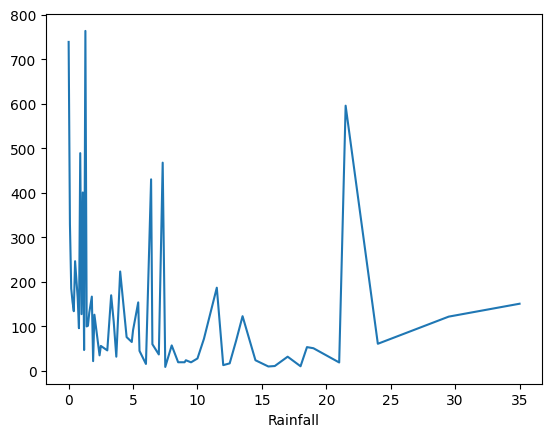

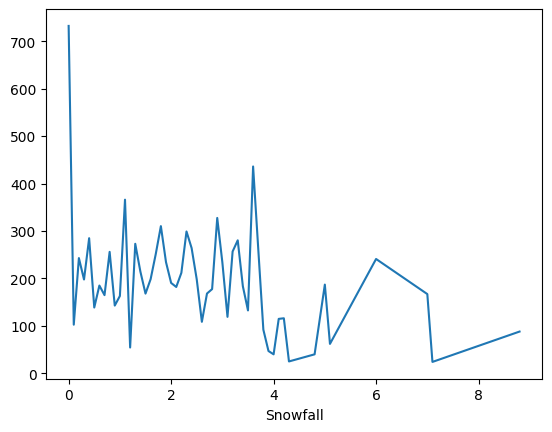

In [ ]:
# making function to print all numerical features
for col in numerical_features1:
  bike_df.groupby(col).mean()['Rented_Bike_Count'].plot();
  plt.show();

* From the above plot we see that people like to ride bikes when it is pretty hot around 25°C average.
* We can see from the above plot that the **demand of rented bike is uniformly distributed** **despite of wind speed** but when the speed of wind was 7 m/s then the demand of bike also increase that clearly means **peoples love to ride bikes when its little windy**.
* from the above plot we see that, the **amount of rented bikes is huge, when there is solar radiation**. when there is increase in solar radiation, there is increase in rented bike.
* we can see from above plot, **when there is no rain, rented bike count is huge**, but when there is rain, we can see increase in bike rented only at certain points, maybe it is when people are going to home from office on weekdays. but otherwise,there is no huge spike in the rented bike.
* We can see from the plot that, on the y-axis, **the amount of rented bike is very low When we have more than 4 cm of snow**, the bike rents is much lower

###**Regression plot**
**The regression plots in seaborn are primarily intended to add a visual guide that helps to emphasize patterns in a dataset during exploratory data analyses. Regression plots as the name suggests creates a regression line between 2 parameters and helps to visualize their linear relationships.**

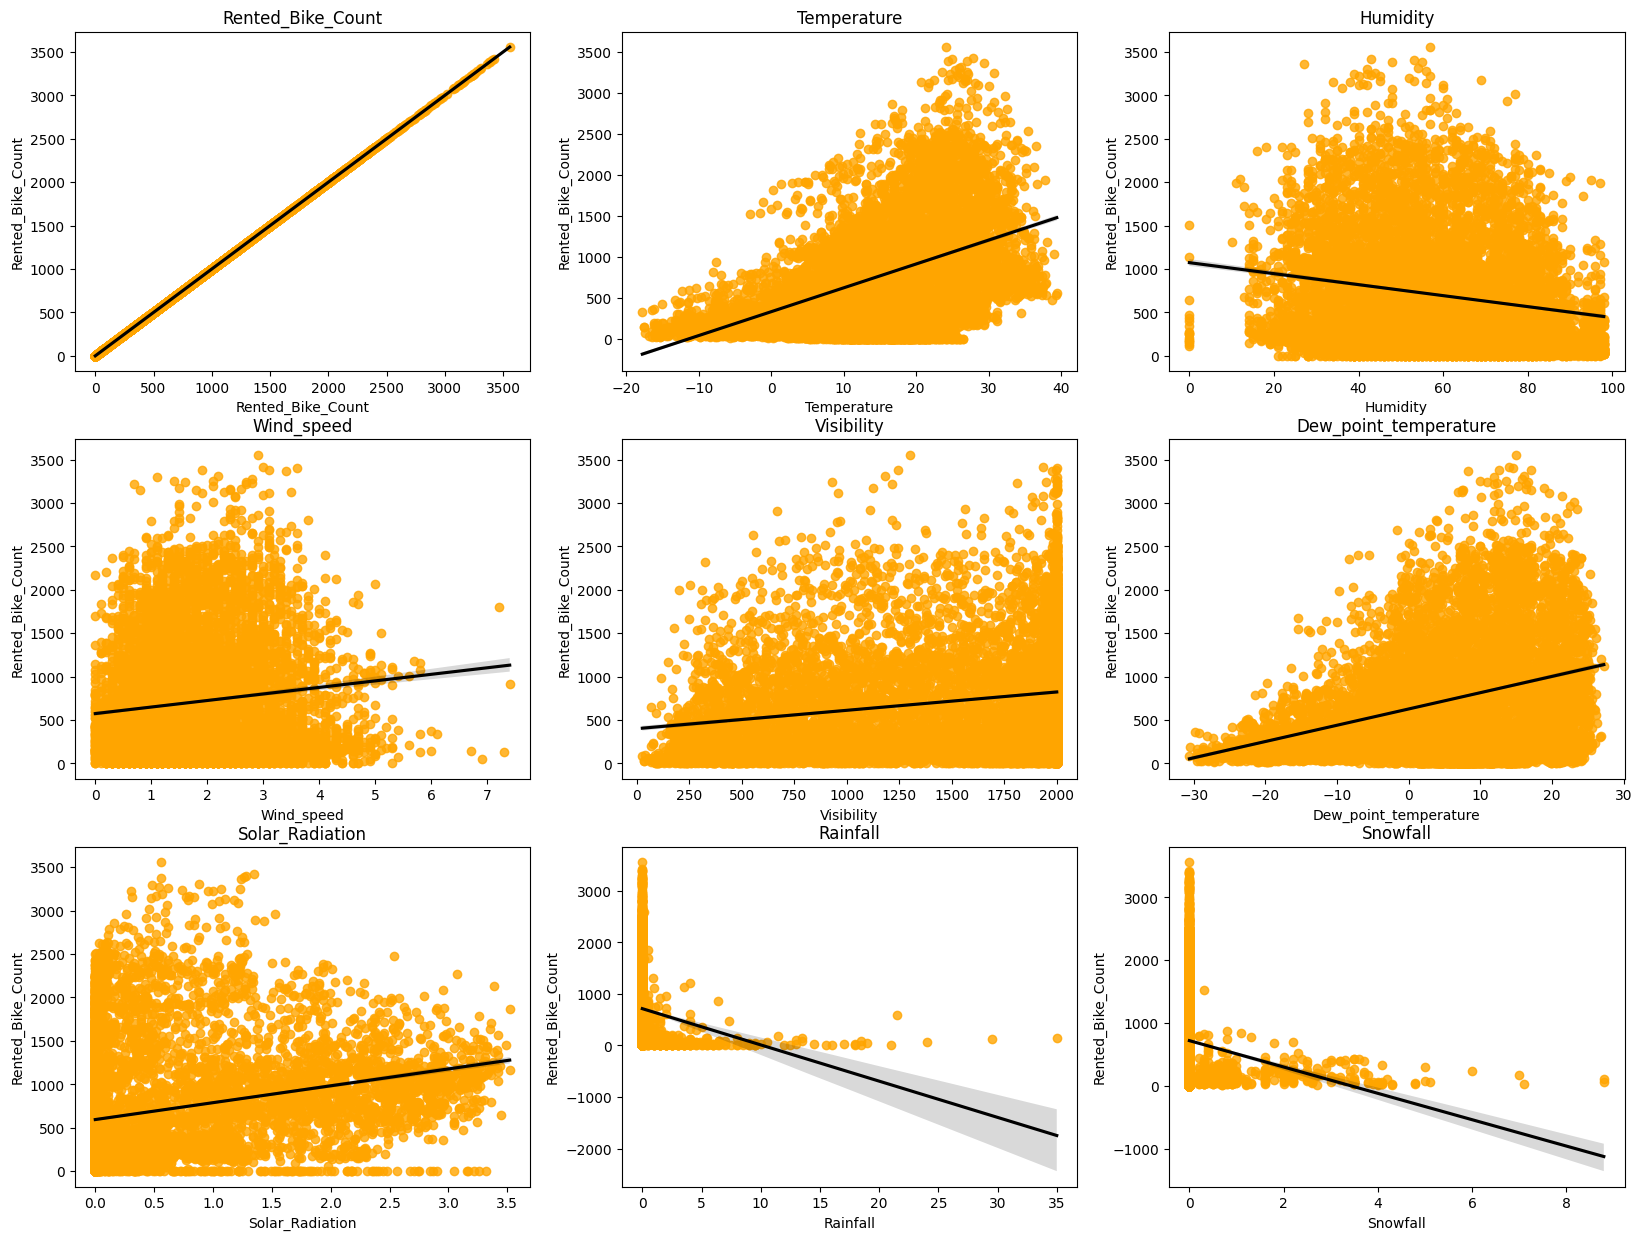

In [ ]:
#printing the regression plot for all the numerical features

plt.figure(figsize=(20,15))

plt.subplot(3,3,1)
plt.title('Rented_Bike_Count')
sns.regplot(x=bike_df['Rented_Bike_Count'],y=bike_df['Rented_Bike_Count'],scatter_kws={"color": 'orange'}, line_kws={"color": "black"});

plt.subplot(3,3,2)
plt.title('Temperature')
sns.regplot(x=bike_df['Temperature'],y=bike_df['Rented_Bike_Count'],scatter_kws={"color": 'orange'}, line_kws={"color": "black"});

plt.subplot(3,3,3)
plt.title('Humidity')
sns.regplot(x=bike_df['Humidity'],y=bike_df['Rented_Bike_Count'],scatter_kws={"color": 'orange'}, line_kws={"color": "black"});

plt.subplot(3,3,4)
plt.title('Wind_speed')
sns.regplot(x=bike_df['Wind_speed'],y=bike_df['Rented_Bike_Count'],scatter_kws={"color": 'orange'}, line_kws={"color": "black"});

plt.subplot(3,3,5)
plt.title('Visibility')
sns.regplot(x=bike_df['Visibility'],y=bike_df['Rented_Bike_Count'],scatter_kws={"color": 'orange'}, line_kws={"color": "black"});

plt.subplot(3,3,6)
plt.title('Dew_point_temperature')
sns.regplot(x=bike_df['Dew_point_temperature'],y=bike_df['Rented_Bike_Count'],scatter_kws={"color": 'orange'}, line_kws={"color": "black"});

plt.subplot(3,3,7)
plt.title('Solar_Radiation')
sns.regplot(x=bike_df['Solar_Radiation'],y=bike_df['Rented_Bike_Count'],scatter_kws={"color": 'orange'}, line_kws={"color": "black"});

plt.subplot(3,3,8)
plt.title('Rainfall')
sns.regplot(x=bike_df['Rainfall'],y=bike_df['Rented_Bike_Count'],scatter_kws={"color": 'orange'}, line_kws={"color": "black"});

plt.subplot(3,3,9)
plt.title('Snowfall')
sns.regplot(x=bike_df['Snowfall'],y=bike_df['Rented_Bike_Count'],scatter_kws={"color": 'orange'}, line_kws={"color": "black"});

* From the above regression plot of all numerical features we see that the columns  **Temperature, Wind_speed, Solar_Radiation Snowfall are positively relation to the target variable**.which means the rented bike count increases with increase of these features.
* **Rainfall, Snowfall, Humidity these features are negatively related with the target variable** which means the rented bike count decreases when these features increase.

##**Normalise Rented_Bike_Count column data**

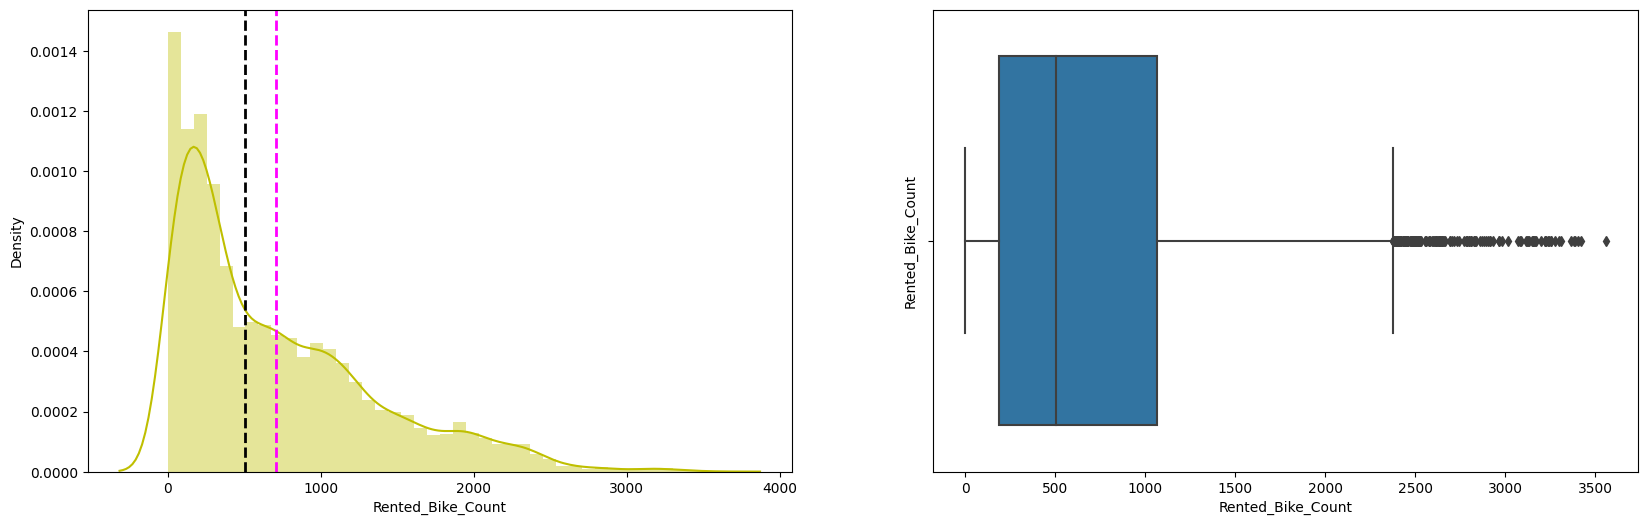

In [ ]:
#Distribution plot of Rented Bike Count
plt.figure(figsize=(20,6))

plt.subplot(1,2,1)
plt.xlabel('Rented_Bike_Count')
plt.ylabel('Density')
ax=sns.distplot(bike_df['Rented_Bike_Count'],hist=True ,color="y")
ax.axvline(bike_df['Rented_Bike_Count'].mean(), color='magenta', linestyle='dashed', linewidth=2)
ax.axvline(bike_df['Rented_Bike_Count'].median(), color='black', linestyle='dashed', linewidth=2)

plt.subplot(1,2,2)
plt.ylabel('Rented_Bike_Count')
sns.boxplot(x=bike_df['Rented_Bike_Count'])
plt.show();

* The above graph shows that Rented Bike Count has **moderate right skewness**. Since the assumption of linear regression is that 'the **distribution of dependent variable has to be normal**', so we should perform some operation to make it normal.since **it is moderately skewed, we have to use square root transformation**.
* The above boxplot shows that we have detect outliers in Rented Bike Count column.

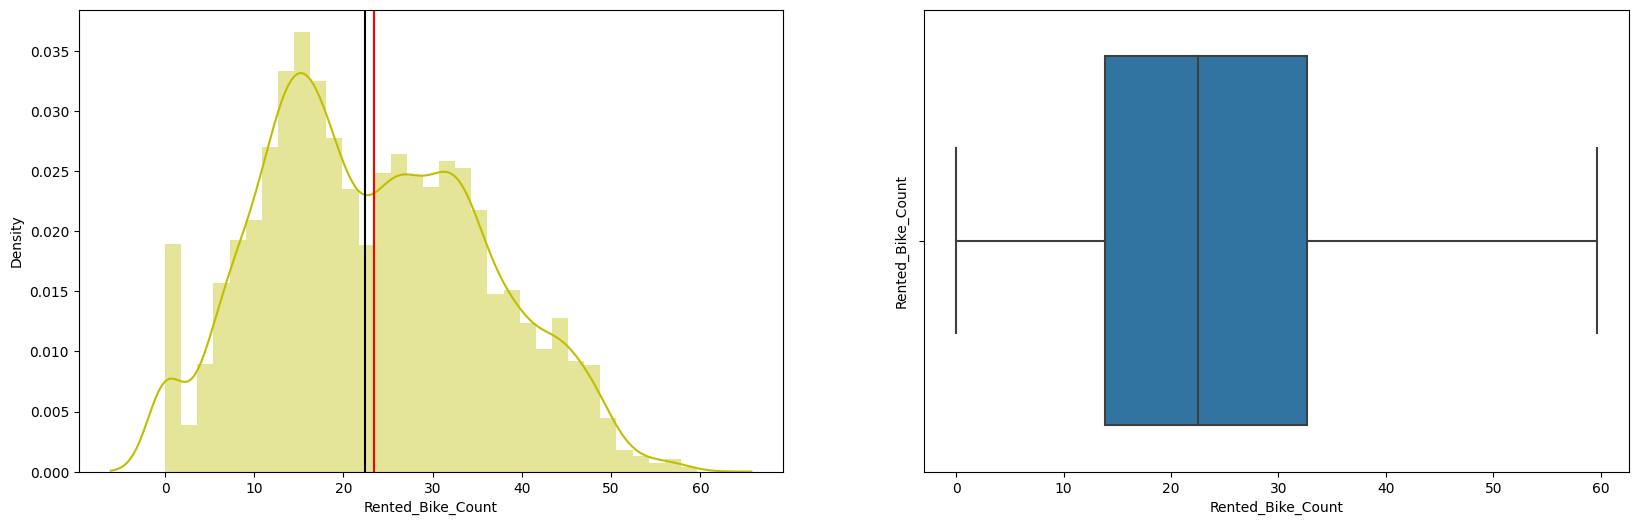

In [ ]:
#applying square root to rented bike count
plt.figure(figsize=(20,6))

plt.subplot(1,2,1)
plt.xlabel('Rented_Bike_Count')
plt.ylabel('Density')
ax=sns.distplot(np.sqrt(bike_df['Rented_Bike_Count']),hist=True ,color="y")
ax.axvline(np.sqrt(bike_df['Rented_Bike_Count']).mean(),color='red')
ax.axvline(np.sqrt(bike_df['Rented_Bike_Count']).median(),color='black')

plt.subplot(1,2,2)
plt.ylabel('Rented_Bike_Count')
sns.boxplot(x=np.sqrt(bike_df['Rented_Bike_Count']))
plt.show();

* Since we have generic rule of applying Square root for the skewed variable in order to make it normal .**After applying Square root to the skewed Rented Bike Count, here we get almost normal distribution**.
* After applying Square root to the Rented Bike Count column, we find that there is no outliers present.

#**6. Feature selection**

###**Checking OLS model**
Ordinary least squares (OLS) regression is a statistical method of analysis that estimates the relationship between one or more independent variables and a dependent variable

In [ ]:
#import the module
#assign the 'x','y' value
import statsmodels.api as sm
x = bike_df[[ 'Temperature','Humidity',
       'Wind_speed', 'Visibility','Dew_point_temperature',
       'Solar_Radiation', 'Rainfall', 'Snowfall']]
y = bike_df['Rented_Bike_Count']


In [ ]:
#add a constant column
x = sm.add_constant(x)   # here we are adding b0

#fit a OLS model 
model= sm.OLS(y,x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Rented_Bike_Count   R-squared:                       0.398
Model:                            OLS   Adj. R-squared:                  0.397
Method:                 Least Squares   F-statistic:                     723.1
Date:                Thu, 06 Apr 2023   Prob (F-statistic):               0.00
Time:                        12:11:10   Log-Likelihood:                -66877.
No. Observations:                8760   AIC:                         1.338e+05
Df Residuals:                    8751   BIC:                         1.338e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   844.6495    106.296      7.946      0.000     636.285    1053.014
Temperature              36.5270      4.169      8.762      0.000      28.355      44.699
Humidity                -10.5077      1.184     -8.872      0.000     -12.829      -8.186
Wind_speed               52.4810      5.661      9.271      0.000      41.385      63.577
Visibility               -0.0097      0.011     -0.886      0.376      -0.031       0.012
Dew_point_temperature    -0.7829      4.402     -0.178      0.859      -9.411       7.846
Solar_Radiation        -118.9772      8.670    -13.724      0.000    -135.971    -101.983
Rainfall                -50.7083      4.932    -10.282      0.000     -60.376     -41.041
Snowfall                 41.0307     12.806      3.204      0.001      15.929      66.133
==============================================================================
Omnibus:                      957.371   Durbin-Watson:                   0.338
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1591.019
Skew:                           0.769   Prob(JB):                         0.00
Kurtosis:                       4.412   Cond. No.                     3.11e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.11e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

* t : the value of t-statistic. It is the ratio of the difference between the estimated and hypothesized value of a parameter, to the standard error
* The Pr(>|t|) column represents the p-value associated with the value in the t value column. If the **p-value is less than a certain significance level (e.g. α = . 05) then the predictor variable is said to have a statistically significant relationship with the response variable in the model**.

* R sqauare and Adj Square are near to each other. **40% of variance in the Rented Bike count** is  explained by the model.
*  For F statistic , P value is less than 0.05 for 5% levelof significance.
*  P value of **dew point temp and visibility** are very high and they are **not significant**.

*  Omnibus tests the skewness and kurtosis of the residuals. Here **the value of Omnibus is high**. it shows we **have skewness** in our data.
*  The **condition number is large**, 3.11e+04. This might indicate that there are **strong multicollinearity** or other numerical problems.  
*  **Durbin-Watson tests** for autocorrelation of the residuals. Here value is less than 0.5. We can say that **there exists a positive auto correlation among the variables**.

###**Correlation Map**

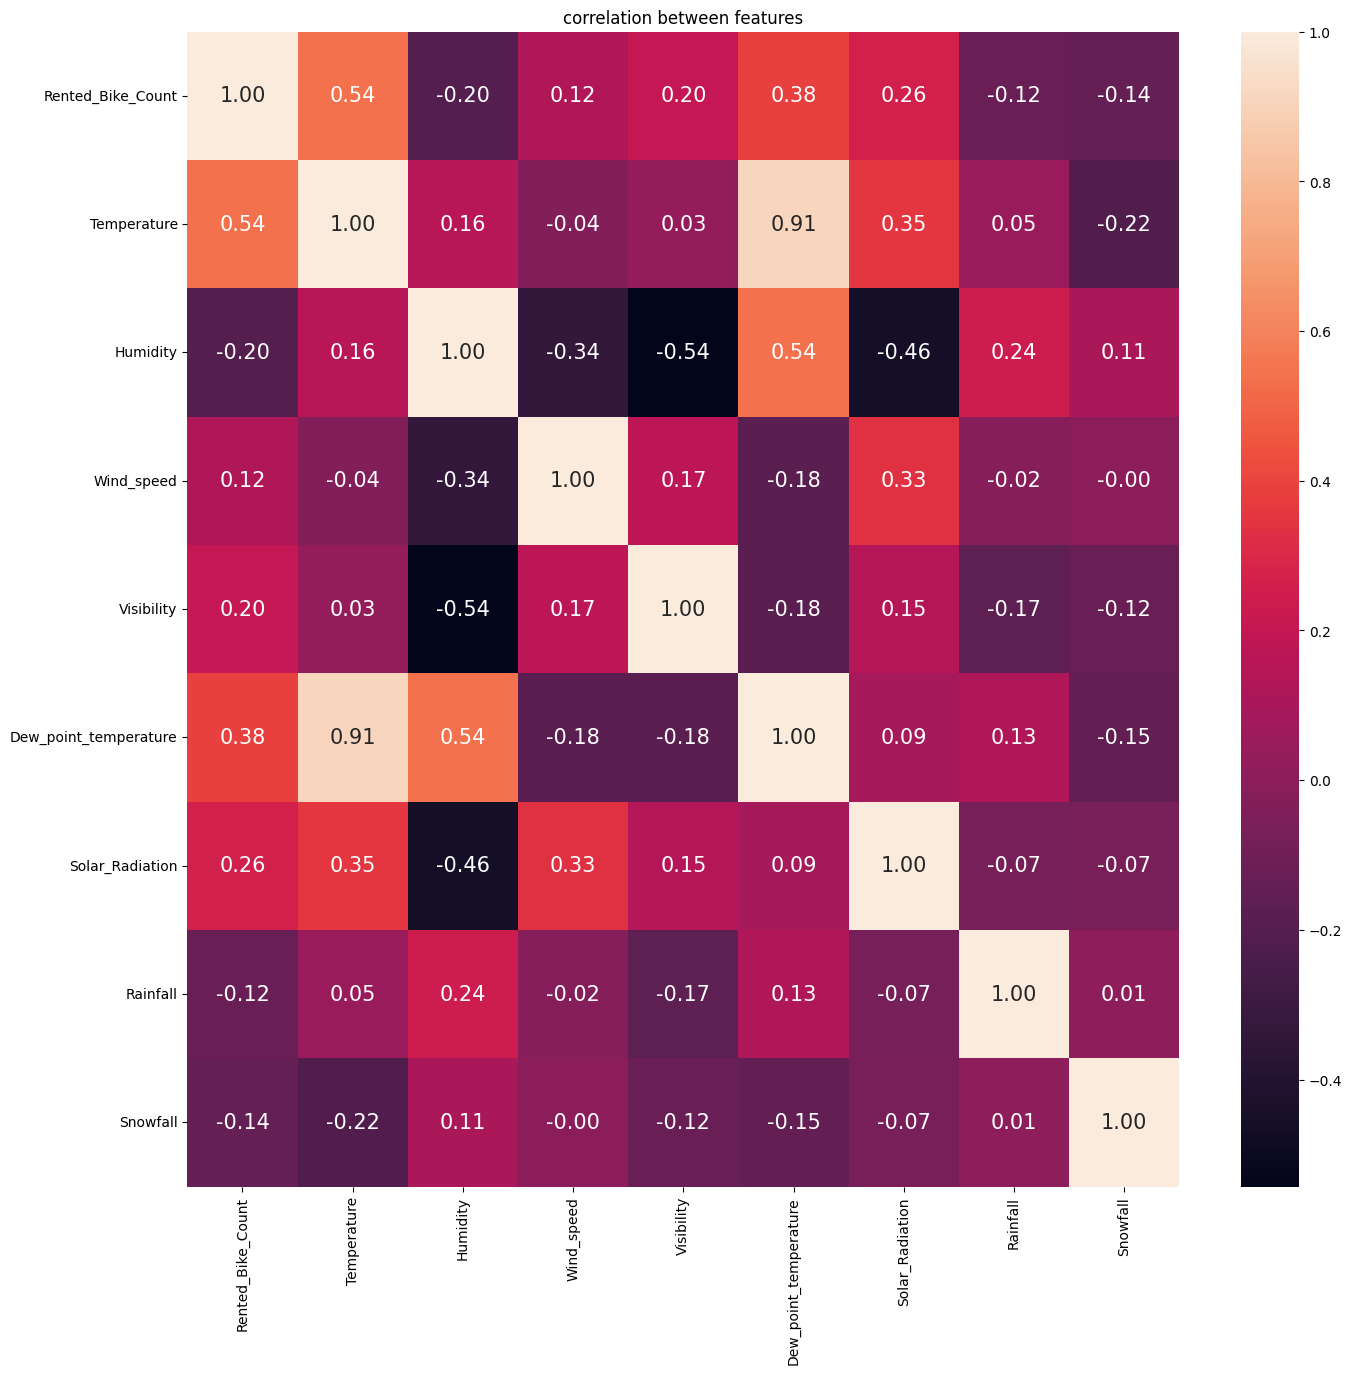

In [ ]:
# correlation map
plt.figure(figsize=(16,15))
corr = bike_df.corr()
sns.heatmap(corr,annot=True,fmt='.2f',annot_kws={'size':15})
plt.title('correlation between features');

***We can observe on the heatmap that on the target variable line the most positively correlated variables to the bike rent are :***

* the temperature
* the dew point temperature
* the solar radiation
* Hour

***And most negatively correlated variables are:***
* Humidity
* Rainfall
* weekdays or weekends


from above correlation map, we can see that, there is **high correlation between 'Dew Point Temperature' and Temperature**. here we are featuring the best suitable model,sp we have to drop either one of the feature i.e. either Temperature or Dew Point Temperature.
* for dropping the **we check the (P>|t|)** value from above table and we can see that the **'Dew_point_temperature' value is higher so we need to drop Dew_point_temperature column.**

In [ ]:
# dropping dew point temperature column
bike_df = bike_df.drop(['Dew_point_temperature','Visibility'],axis=1)

##Changing data type
* As "Hour","month","weekdays_weekend" column are show as a integer data type but actually it is a category data tyepe. so we need to change this data type.

In [ ]:
#Change the int64 column into catagory column
cols=['Hour','month','weekdays_weekend']
for i in cols:
  bike_df[i]=bike_df[i].astype('category')

In [ ]:
#let's check the result of data type
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Rented_Bike_Count  8760 non-null   int64   
 1   Hour               8760 non-null   category
 2   Temperature        8760 non-null   float64 
 3   Humidity           8760 non-null   int64   
 4   Wind_speed         8760 non-null   float64 
 5   Solar_Radiation    8760 non-null   float64 
 6   Rainfall           8760 non-null   float64 
 7   Snowfall           8760 non-null   float64 
 8   Seasons            8760 non-null   object  
 9   Holiday            8760 non-null   object  
 10  Functioning_Day    8760 non-null   object  
 11  month              8760 non-null   category
 12  weekdays_weekend   8760 non-null   category
dtypes: category(3), float64(5), int64(2), object(3)
memory usage: 711.4+ KB


In [ ]:

#Getting columns
bike_df.columns

Index(['Rented_Bike_Count', 'Hour', 'Temperature', 'Humidity', 'Wind_speed',
       'Solar_Radiation', 'Rainfall', 'Snowfall', 'Seasons', 'Holiday',
       'Functioning_Day', 'month', 'weekdays_weekend'],
      dtype='object')

In [ ]:
# description of numerical values
bike_df.describe().astype(float).T

count        mean         std   min    25%     50%  \
Rented_Bike_Count  8760.0  704.602055  644.997468   0.0  191.0  504.50   
Temperature        8760.0   12.882922   11.944825 -17.8    3.5   13.70   
Humidity           8760.0   58.226256   20.362413   0.0   42.0   57.00   
Wind_speed         8760.0    1.724909    1.036300   0.0    0.9    1.50   
Solar_Radiation    8760.0    0.569111    0.868746   0.0    0.0    0.01   
Rainfall           8760.0    0.148687    1.128193   0.0    0.0    0.00   
Snowfall           8760.0    0.075068    0.436746   0.0    0.0    0.00   

                       75%      max  
Rented_Bike_Count  1065.25  3556.00  
Temperature          22.50    39.40  
Humidity             74.00    98.00  
Wind_speed            2.30     7.40  
Solar_Radiation       0.93     3.52  
Rainfall              0.00    35.00  
Snowfall              0.00     8.80

In [ ]:
# description of object values
bike_df.describe(include='O').T

count unique         top  freq
Seasons          8760      4      Spring  2208
Holiday          8760      2  No Holiday  8328
Functioning_Day  8760      2         Yes  8465

* here we can see that, **highest rented bike** is during **Spring season**.
* here we can see that, **highest rented bike** is when there is **no Holiday and Functioning Day**.

#**7. Data preprocessing**

##**Create Dummy Variables**
A dataset may contain various type of values, sometimes it consists of categorical values. So, in-order to use those categorical value for programming efficiently we create dummy variables.

In [ ]:
categorical_features = bike_df.select_dtypes(['object','category']).columns
categorical_features

Index(['Hour', 'Seasons', 'Holiday', 'Functioning_Day', 'month',
       'weekdays_weekend'],
      dtype='object')

###**one hot encoding**

In [ ]:
#creat a copy
bike_df_copy = bike_df

def one_hot_encoding(data, column):
    data = pd.concat([data, pd.get_dummies(data[column], prefix=column, drop_first=True)], axis=1)
    data = data.drop([column], axis=1)
    return data

for col in categorical_features:
    bike_df_copy = one_hot_encoding(bike_df_copy, col)
bike_df_copy.head()

Rented_Bike_Count  Temperature  Humidity  Wind_speed  Solar_Radiation  \
0                254         -5.2        37         2.2              0.0   
1                204         -5.5        38         0.8              0.0   
2                173         -6.0        39         1.0              0.0   
3                107         -6.2        40         0.9              0.0   
4                 78         -6.0        36         2.3              0.0   

   Rainfall  Snowfall  Hour_1  Hour_2  Hour_3  ...  month_4  month_5  month_6  \
0       0.0       0.0       0       0       0  ...        0        0        0   
1       0.0       0.0       1       0       0  ...        0        0        0   
2       0.0       0.0       0       1       0  ...        0        0        0   
3       0.0       0.0       0       0       1  ...        0        0        0   
4       0.0       0.0       0       0       0  ...        0        0        0   

   month_7  month_8  month_9  month_10  month_11  month_12  weekdays_weekend_1  
0        0        0        0         0         0         1                   0  
1        0        0        0         0         0         1                   0  
2        0        0        0         0         0         1                   0  
3        0        0        0         0         0         1                   0  
4        0        0        0         0         0         1                   0  

[5 rows x 47 columns]

In [ ]:
#one hot encoding using simple method
bike_df1 = pd.concat([bike_df,pd.get_dummies(bike_df[['Hour','Seasons', 'Holiday', 'Functioning_Day', 'month','weekdays_weekend']],drop_first=True)],axis=1)




In [ ]:
bike_df1

Rented_Bike_Count Hour  Temperature  Humidity  Wind_speed  \
0                   254    0         -5.2        37         2.2   
1                   204    1         -5.5        38         0.8   
2                   173    2         -6.0        39         1.0   
3                   107    3         -6.2        40         0.9   
4                    78    4         -6.0        36         2.3   
...                 ...  ...          ...       ...         ...   
8755               1003   19          4.2        34         2.6   
8756                764   20          3.4        37         2.3   
8757                694   21          2.6        39         0.3   
8758                712   22          2.1        41         1.0   
8759                584   23          1.9        43         1.3   

      Solar_Radiation  Rainfall  Snowfall Seasons     Holiday  ... month_4  \
0                 0.0       0.0       0.0  Winter  No Holiday  ...       0   
1                 0.0       0.0       0.0  Winter  No Holiday  ...       0   
2                 0.0       0.0       0.0  Winter  No Holiday  ...       0   
3                 0.0       0.0       0.0  Winter  No Holiday  ...       0   
4                 0.0       0.0       0.0  Winter  No Holiday  ...       0   
...               ...       ...       ...     ...         ...  ...     ...   
8755              0.0       0.0       0.0  Autumn  No Holiday  ...       0   
8756              0.0       0.0       0.0  Autumn  No Holiday  ...       0   
8757              0.0       0.0       0.0  Autumn  No Holiday  ...       0   
8758              0.0       0.0       0.0  Autumn  No Holiday  ...       0   
8759              0.0       0.0       0.0  Autumn  No Holiday  ...       0   

     month_5 month_6  month_7  month_8  month_9  month_10  month_11  month_12  \
0          0       0        0        0        0         0         0         1   
1          0       0        0        0        0         0         0         1   
2          0       0        0        0        0         0         0         1   
3          0       0        0        0        0         0         0         1   
4          0       0        0        0        0         0         0         1   
...      ...     ...      ...      ...      ...       ...       ...       ...   
8755       0       0        0        0        0         0         1         0   
8756       0       0        0        0        0         0         1         0   
8757       0       0        0        0        0         0         1         0   
8758       0       0        0        0        0         0         1         0   
8759       0       0        0        0        0         0         1         0   

      weekdays_weekend_1  
0                      0  
1                      0  
2                      0  
3                      0  
4                      0  
...                  ...  
8755                   0  
8756                   0  
8757                   0  
8758                   0  
8759                   0  

[8760 rows x 53 columns]

In [ ]:
#Checking Variance Inflaition Factor
from statsmodels.stats.outliers_influence import variance_inflation_factor

def cal_vif(x):
  vif = pd.DataFrame()
  vif['variables'] = x.columns
  vif['VIF'] = [variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
  return vif

In [ ]:
VIF_table = cal_vif(bike_df1[[i for i in bike_df1.describe().columns if i not in ['Rented_Bike_Count']]])
VIF_table

variables        VIF
0           Temperature  10.001786
1              Humidity   1.965836
2            Wind_speed   1.420877
3       Solar_Radiation   4.628900
4              Rainfall   1.093895
5              Snowfall   1.137300
6                Hour_1   1.919395
7                Hour_2   1.922775
8                Hour_3   1.926064
9                Hour_4   1.928428
10               Hour_5   1.935548
11               Hour_6   1.939752
12               Hour_7   1.942153
13               Hour_8   1.963847
14               Hour_9   2.047052
15              Hour_10   2.211683
16              Hour_11   2.399238
17              Hour_12   2.553273
18              Hour_13   2.610707
19              Hour_14   2.538990
20              Hour_15   2.418977
21              Hour_16   2.257429
22              Hour_17   2.120543
23              Hour_18   2.029323
24              Hour_19   1.981786
25              Hour_20   1.957422
26              Hour_21   1.935594
27              Hour_22   1.922541
28              Hour_23   1.917980
29       Seasons_Spring        inf
30       Seasons_Summer        inf
31       Seasons_Winter  25.987840
32   Holiday_No Holiday   1.044106
33  Functioning_Day_Yes   1.084385
34              month_2   1.817986
35              month_3        inf
36              month_4        inf
37              month_5        inf
38              month_6        inf
39              month_7        inf
40              month_8        inf
41              month_9  10.622446
42             month_10   9.541915
43             month_11   8.734294
44             month_12   1.888423
45   weekdays_weekend_1   1.008333

Here, we can see that, **August, September, June, May, April, March,Spring,Summer** have infinite Variation Inflation Factor. So, we drop those columns.

In [ ]:
# dropping column which has infinite VIF
final_bike_df = bike_df1.drop(['month_8','month_7', 'month_6', 'month_5', 'month_4','month_3','Seasons_Spring',
                               'Seasons_Summer','Hour','Seasons', 'Holiday', 'Functioning_Day', 'month','weekdays_weekend'],axis=1)

final_bike_df

Rented_Bike_Count  Temperature  Humidity  Wind_speed  Solar_Radiation  \
0                   254         -5.2        37         2.2              0.0   
1                   204         -5.5        38         0.8              0.0   
2                   173         -6.0        39         1.0              0.0   
3                   107         -6.2        40         0.9              0.0   
4                    78         -6.0        36         2.3              0.0   
...                 ...          ...       ...         ...              ...   
8755               1003          4.2        34         2.6              0.0   
8756                764          3.4        37         2.3              0.0   
8757                694          2.6        39         0.3              0.0   
8758                712          2.1        41         1.0              0.0   
8759                584          1.9        43         1.3              0.0   

      Rainfall  Snowfall  Hour_1  Hour_2  Hour_3  ...  Hour_23  \
0          0.0       0.0       0       0       0  ...        0   
1          0.0       0.0       1       0       0  ...        0   
2          0.0       0.0       0       1       0  ...        0   
3          0.0       0.0       0       0       1  ...        0   
4          0.0       0.0       0       0       0  ...        0   
...        ...       ...     ...     ...     ...  ...      ...   
8755       0.0       0.0       0       0       0  ...        0   
8756       0.0       0.0       0       0       0  ...        0   
8757       0.0       0.0       0       0       0  ...        0   
8758       0.0       0.0       0       0       0  ...        0   
8759       0.0       0.0       0       0       0  ...        1   

      Seasons_Winter  Holiday_No Holiday  Functioning_Day_Yes  month_2  \
0                  1                   1                    1        0   
1                  1                   1                    1        0   
2                  1                   1                    1        0   
3                  1                   1                    1        0   
4                  1                   1                    1        0   
...              ...                 ...                  ...      ...   
8755               0                   1                    1        0   
8756               0                   1                    1        0   
8757               0                   1                    1        0   
8758               0                   1                    1        0   
8759               0                   1                    1        0   

      month_9  month_10  month_11  month_12  weekdays_weekend_1  
0           0         0         0         1                   0  
1           0         0         0         1                   0  
2           0         0         0         1                   0  
3           0         0         0         1                   0  
4           0         0         0         1                   0  
...       ...       ...       ...       ...                 ...  
8755        0         0         1         0                   0  
8756        0         0         1         0                   0  
8757        0         0         1         0                   0  
8758        0         0         1         0                   0  
8759        0         0         1         0                   0  

[8760 rows x 39 columns]

#**8. ML model implementation**

###**Train Test Split for regression**
Before, fitting any model it is a rule of thumb to split the dataset into a training and test set. This means some proportions of the data will go into training the model and some portion will be used to evaluate how our model is performing on any unseen data. The proportions may vary from 60:40, 70:30, 75:25 depending on the person but mostly used is 80:20 for training and testing respectively. In this step we will split our data into training and testing set using scikit learn library.

In [ ]:
#Assign the value in X and Y
x = final_bike_df.drop(['Rented_Bike_Count'],axis=1)
y = np.sqrt(final_bike_df['Rented_Bike_Count'])

In [ ]:
x.head()

Temperature  Humidity  Wind_speed  Solar_Radiation  Rainfall  Snowfall  \
0         -5.2        37         2.2              0.0       0.0       0.0   
1         -5.5        38         0.8              0.0       0.0       0.0   
2         -6.0        39         1.0              0.0       0.0       0.0   
3         -6.2        40         0.9              0.0       0.0       0.0   
4         -6.0        36         2.3              0.0       0.0       0.0   

   Hour_1  Hour_2  Hour_3  Hour_4  ...  Hour_23  Seasons_Winter  \
0       0       0       0       0  ...        0               1   
1       1       0       0       0  ...        0               1   
2       0       1       0       0  ...        0               1   
3       0       0       1       0  ...        0               1   
4       0       0       0       1  ...        0               1   

   Holiday_No Holiday  Functioning_Day_Yes  month_2  month_9  month_10  \
0                   1                    1        0        0         0   
1                   1                    1        0        0         0   
2                   1                    1        0        0         0   
3                   1                    1        0        0         0   
4                   1                    1        0        0         0   

   month_11  month_12  weekdays_weekend_1  
0         0         1                   0  
1         0         1                   0  
2         0         1                   0  
3         0         1                   0  
4         0         1                   0  

[5 rows x 38 columns]

In [ ]:
y.head()

0    15.937377
1    14.282857
2    13.152946
3    10.344080
4     8.831761
Name: Rented_Bike_Count, dtype: float64

In [ ]:
#Creat test and train data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=0)
print(x_train.shape)
print(x_test.shape)

(7008, 38)
(1752, 38)


In [ ]:
final_bike_df.columns

Index(['Rented_Bike_Count', 'Temperature', 'Humidity', 'Wind_speed',
       'Solar_Radiation', 'Rainfall', 'Snowfall', 'Hour_1', 'Hour_2', 'Hour_3',
       'Hour_4', 'Hour_5', 'Hour_6', 'Hour_7', 'Hour_8', 'Hour_9', 'Hour_10',
       'Hour_11', 'Hour_12', 'Hour_13', 'Hour_14', 'Hour_15', 'Hour_16',
       'Hour_17', 'Hour_18', 'Hour_19', 'Hour_20', 'Hour_21', 'Hour_22',
       'Hour_23', 'Seasons_Winter', 'Holiday_No Holiday',
       'Functioning_Day_Yes', 'month_2', 'month_9', 'month_10', 'month_11',
       'month_12', 'weekdays_weekend_1'],
      dtype='object')

###**Function for heteroscedasticity**

In [ ]:
#Function for Heteroscedasticity 
def Heteroscedasticity(y_test,y_pred_test):  
  residuals = y_test - y_pred_test  
  ### Heteroscadacity
  plt.figure(figsize=(15,5))
  #plotting the residuals
  plt.subplot(1,2,1)
  plt.xlabel('residuals')
  sns.distplot(residuals);

  #plotting the scatterplot
  plt.subplot(1,2,2)
  plt.xlabel('scatterplot of residuals')
  plt.scatter(y_pred_test,residuals);

  plt.show();

##**Linear Regression**

In [ ]:
#import the packages
from sklearn.linear_model import LinearRegression
Linear_Regression = LinearRegression()
Linear_Regression.fit(x_train,y_train)

LinearRegression()

In [ ]:
#check the coefficeint
Linear_Regression.coef_

array([ 0.45370434, -0.14279422, -0.0890076 ,  1.31778608, -1.52193517,
       -0.098716  , -1.93946824, -4.93319346, -7.37507289, -9.54976249,
       -9.21759455, -4.20909232,  1.95503812,  7.18285184,  0.72665806,
       -3.75157247, -4.12906371, -3.45531968, -3.71864439, -3.68038972,
       -2.3699891 , -0.31904573,  3.6694746 , 10.2908261 ,  6.91876685,
        6.21146346,  6.42228769,  5.14840626,  1.54600506, -4.90038386,
        3.24926342, 28.18018268, -0.78124574,  2.22692796,  4.4758314 ,
        3.00928264,  2.15804912, -1.47843366])

In [ ]:
#get the X_train and X-test value
y_pred_train=Linear_Regression.predict(x_train)
y_pred_test=Linear_Regression.predict(x_test)

In [ ]:
#Training dataset of linear regression
#calculate MSE
print('Metric value of training dataset')
MSE_lr = mean_squared_error(y_train, y_pred_train)    
print("MSE :",MSE_lr)
#calculate RMSE 
RMSE_lr = np.sqrt(MSE_lr)   
print("RMSE :",RMSE_lr)
#calculate MAE 
MAE_lr = mean_absolute_error(y_train, y_pred_train)       
print("MAE :",MAE_lr)
#calculate r2 and adjusted r2
r2_lr = r2_score(y_train, y_pred_train)         
print("R2 :",r2_lr)
Adjusted_r2_lr = 1-(((1-r2_lr)*(x_test.shape[0]-1))/(x_test.shape[0]-x_test.shape[1]-1))
print("Adjusted R2 :",Adjusted_r2_lr)

Metric value of training dataset
MSE : 38.13037631387261
RMSE : 6.174979863438634
MAE : 4.670614010286671
R2 : 0.7529345894242789
Adjusted R2 : 0.747453862277824


In [ ]:
# storing the test set metrics value in a dataframe for later comparison
dict1={'Model':'Linear regression of train dataset',
       'MAE':round((MAE_lr),3),
       'MSE':round((MSE_lr),3),
       'RMSE':round((RMSE_lr),3),
       'R2_score':round((r2_lr),3),
       'Adjusted R2':round((Adjusted_r2_lr),3)
       }
training_df=pd.DataFrame(dict1,index=[1])
training_df

Model    MAE    MSE   RMSE  R2_score  \
1  Linear regression of train dataset  4.671  38.13  6.175     0.753   

   Adjusted R2  
1        0.747

In [ ]:
#Testing dataset
#calculate MSE 
print('Metric value of testing dataset')
MSE_lr = mean_squared_error(y_test, y_pred_test)    
print("MSE :",MSE_lr)
#calculate RMSE 
RMSE_lr = np.sqrt(MSE_lr)   
print("RMSE :",RMSE_lr)
#calculate MAE 
MAE_lr = mean_absolute_error(y_test, y_pred_test)       
print("MAE :",MAE_lr)
#calculate r2 and adjusted r2
r2_lr = r2_score(y_test, y_pred_test)         
print("R2 :",r2_lr)
Adjusted_r2_lr = 1-(((1-r2_lr)*(x_test.shape[0]-1))/(x_test.shape[0]-x_test.shape[1]-1))
print("Adjusted R2 :",Adjusted_r2_lr)

Metric value of testing dataset
MSE : 36.88761833078854
RMSE : 6.073517788793291
MAE : 4.660212319351676
R2 : 0.7657724617251649
Adjusted R2 : 0.7605765210045322


In [ ]:

# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Linear regression of test dataset',
       'MAE':round((MAE_lr),3),
       'MSE':round((MSE_lr),3),
       'RMSE':round((RMSE_lr),3),
       'R2_score':round((r2_lr),3),
       'Adjusted R2':round((Adjusted_r2_lr),3)
       }
testing_df=pd.DataFrame(dict2,index=[1])
testing_df

Model   MAE     MSE   RMSE  R2_score  \
1  Linear regression of test dataset  4.66  36.888  6.074     0.766   

   Adjusted R2  
1        0.761

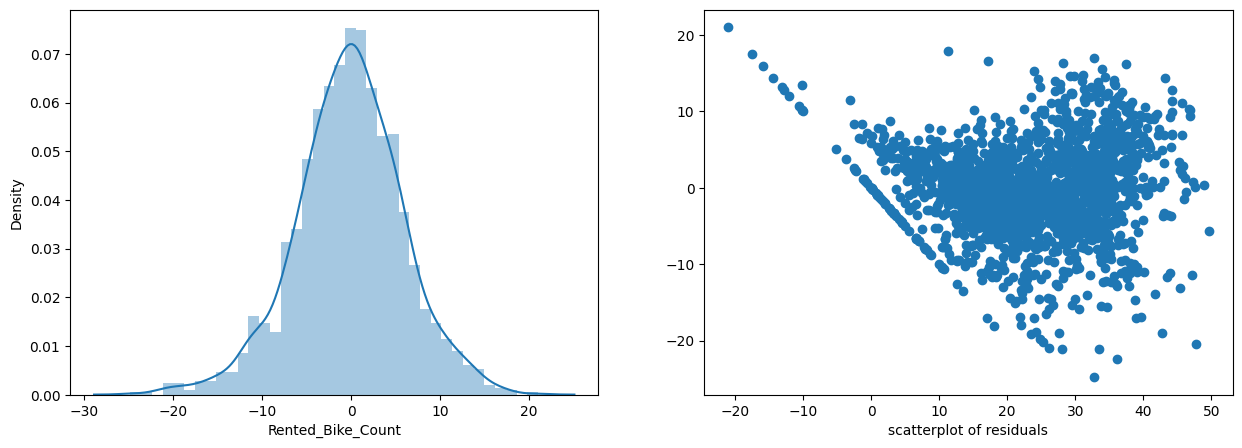

In [ ]:
Heteroscedasticity(y_test,y_pred_test)

* Our **Simple Linear Regression Model** is performing well on train dataset as we can see from **R2 score(0.75) and adjusted R2 score(0.74)**.
* the R^2 of test dataset is pretty much high i.e. 0.76 and adjusted R^2 of test dataset is nearly same to R^2 i.e. 0.76. means our model is performing well on test dataset.
* Heteroscedasticity is a problem because ordinary least squares (OLS) regression assumes that **all residuals are drawn from a population that has a constant variance (homoscedasticity)**. To satisfy the regression assumptions and be able to trust the results, **the residuals should have a constant variance**.
* here, we can see, our model is performing well on the dataset.

##**Lasso Regression**

In [ ]:
# Create an instance of Lasso Regression implementation
from sklearn.linear_model import Lasso
lasso_regression = Lasso(alpha=1.0, max_iter=3000)
lasso_regression.fit(x_train,y_train)

Lasso(max_iter=3000)

In [ ]:
#get the y_pred_train and y_pred_test value
y_pred_train=lasso_regression.predict(x_train)
y_pred_test=lasso_regression.predict(x_test)

In [ ]:
#Calculating metric value for testing dataset
print('Metric value of training dataset')
#Calculate MSE
MSE_l = mean_squared_error(y_train, y_pred_train)    
print("MSE :",MSE_l)
#calculate RMSE 
RMSE_l = np.sqrt(MSE_l)   
print("RMSE :",RMSE_l)
#calculate MAE 
MAE_l = mean_absolute_error(y_train, y_pred_train)       
print("MAE :",MAE_l)
#calculate r2 and adjusted r2
r2_l = r2_score(y_train, y_pred_train)         
print("R2 :",r2_l)
Adjusted_r2_l = 1-(((1-r2_l)*(x_test.shape[0]-1))/(x_test.shape[0]-x_test.shape[1]-1))
print("Adjusted R2 :",Adjusted_r2_l)
#creating table of metric values
dict1={'Model':'Lasso Regression',
       'MAE':round((MAE_l),3),
       'MSE':round((MSE_l),3),
       'RMSE':round((RMSE_l),3),
       'R2_score':round((r2_l),3),
       'Adjusted R2':round((Adjusted_r2_l),3)
        }
training_df = training_df.append(dict1,ignore_index=True)

#Calculating metric value for testing dataset
#calculate MSE
print('Metric value of testing dataset')
MSE_l = mean_squared_error(y_test, y_pred_test)    
print("MSE :",MSE_l)
#calculate RMSE 
RMSE_l = np.sqrt(MSE_l)   
print("RMSE :",RMSE_l)
#calculate MAE 
MAE_l = mean_absolute_error(y_test, y_pred_test)       
print("MAE :",MAE_l)
#calculate r2 and adjusted r2
r2_l = r2_score(y_test, y_pred_test)         
print("R2 :",r2_l)
Adjusted_r2 = 1-(((1-r2_l)*(x_test.shape[0]-1))/(x_test.shape[0]-x_test.shape[1]-1))
print("Adjusted R2 :",Adjusted_r2_l)
#creating table of metric values
dict2={'Model':'Lasso Regression',
       'MAE':round((MAE_l),3),
       'MSE':round((MSE_l),3),
       'RMSE':round((RMSE_l),3),
       'R2_score':round((r2_l),3),
       'Adjusted R2':round((Adjusted_r2_l),3)
        }
testing_df = testing_df.append(dict2,ignore_index=True)

Metric value of training dataset
MSE : 91.85515909517972
RMSE : 9.584109718444365
MAE : 7.265408662620745
R2 : 0.4048253704988449
Adjusted R2 : 0.3916224306733669
Metric value of testing dataset
MSE : 97.0209200758311
RMSE : 9.849919800477114
MAE : 7.453504264725606
R2 : 0.38394040334249846
Adjusted R2 : 0.3916224306733669


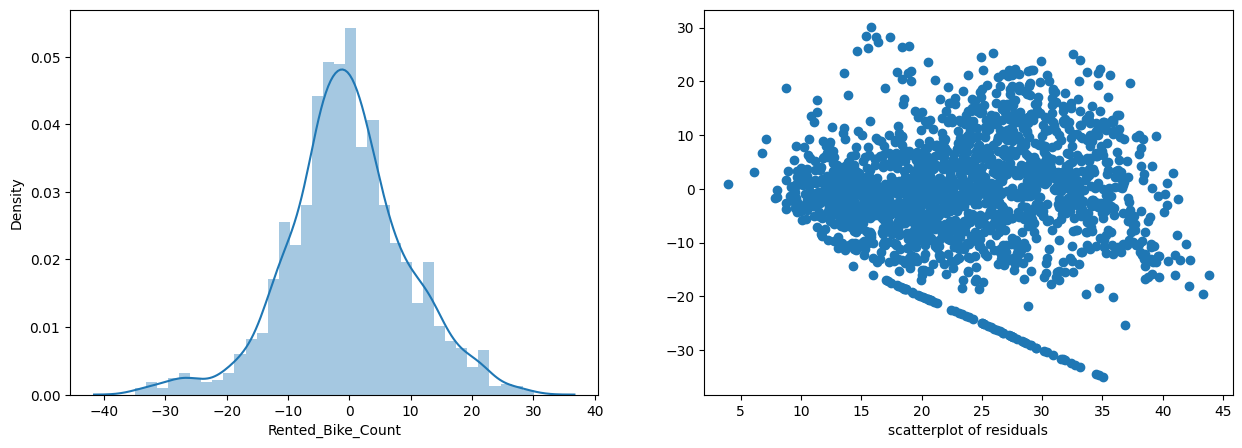

In [ ]:
#Heteroscedasticity
Heteroscedasticity(y_test,y_pred_test)

* Our **Lasso regression model** is not performing well on train dataset as we can see from **R2 score(0.40) and adjusted R2 score(0.39)**.
* the **R^2 of test dataset** is pretty much low i.e.**0.38** and **adjusted R^2 of test dataset** is nearly same to R^2 i.e.**0.39**. means our model is not performing well on test dataset.
* Heteroscedasticity is a problem because ordinary least squares (OLS) regression assumes that **all residuals are drawn from a population that has a constant variance (homoscedasticity)**. To satisfy the regression assumptions and be able to trust the results, **the residuals should have a constant variance**.
* here, we can see, our model is performing well on the dataset.

##**Ridge Regression**

In [ ]:
#import the packages
from sklearn.linear_model import Ridge
ridge_regression = Ridge(alpha=0.1)
ridge_regression.fit(x_train,y_train)

Ridge(alpha=0.1)

In [ ]:
#get the y_pred_train and y_pred_test value
y_pred_train=ridge_regression.predict(x_train)
y_pred_test=ridge_regression.predict(x_test)

In [ ]:
#Calculating metric value for testing dataset
print('Metric value of training dataset')
#Calculate MSE
MSE_r = mean_squared_error(y_train, y_pred_train)    
print("MSE :",MSE_r)
#calculate RMSE 
RMSE_r = np.sqrt(MSE_r)   
print("RMSE :",RMSE_r)
#calculate MAE 
MAE_r = mean_absolute_error(y_train, y_pred_train)       
print("MAE :",MAE_r)
#calculate r2 and adjusted r2
r2_r = r2_score(y_train, y_pred_train)         
print("R2 :",r2_r)
Adjusted_r2_r = 1-(((1-r2_r)*(x_test.shape[0]-1))/(x_test.shape[0]-x_test.shape[1]-1))
print("Adjusted R2 :",Adjusted_r2_r)
#creating table of metric values
dict1={'Model':'Ridge Regression',
       'MAE':round((MAE_r),3),
       'MSE':round((MSE_r),3),
       'RMSE':round((RMSE_r),3),
       'R2_score':round((r2_r),3),
       'Adjusted R2':round((Adjusted_r2_r),3)
        }
training_df = training_df.append(dict1,ignore_index=True)

#Calculating metric value for testing dataset
#calculate MSE
print('Metric value of testing dataset')
MSE_r = mean_squared_error(y_test, y_pred_test)    
print("MSE :",MSE_r)
#calculate RMSE 
RMSE_r = np.sqrt(MSE_r)   
print("RMSE :",RMSE_r)
#calculate MAE 
MAE_r = mean_absolute_error(y_test, y_pred_test)       
print("MAE :",MAE_r)
#calculate r2 and adjusted r2
r2_r = r2_score(y_test, y_pred_test)         
print("R2 :",r2_r)
Adjusted_r2_r = 1-(((1-r2_r)*(x_test.shape[0]-1))/(x_test.shape[0]-x_test.shape[1]-1))
print("Adjusted R2 :",Adjusted_r2_r)
#creating table of metric values
dict2={'Model':'Ridge Regression',
       'MAE':round((MAE_r),3),
       'MSE':round((MSE_r),3),
       'RMSE':round((RMSE_r),3),
       'R2_score':round((r2_r),3),
       'Adjusted R2':round((Adjusted_r2_r),3)
        }
testing_df = testing_df.append(dict2,ignore_index=True)

Metric value of training dataset
MSE : 38.130387273319556
RMSE : 6.174980750846075
MAE : 4.670665217557736
R2 : 0.7529345184126468
Adjusted R2 : 0.7474537896909192
Metric value of testing dataset
MSE : 36.88910476253261
RMSE : 6.073640157478265
MAE : 4.660384345228405
R2 : 0.7657630232397331
Adjusted R2 : 0.7605668731423074


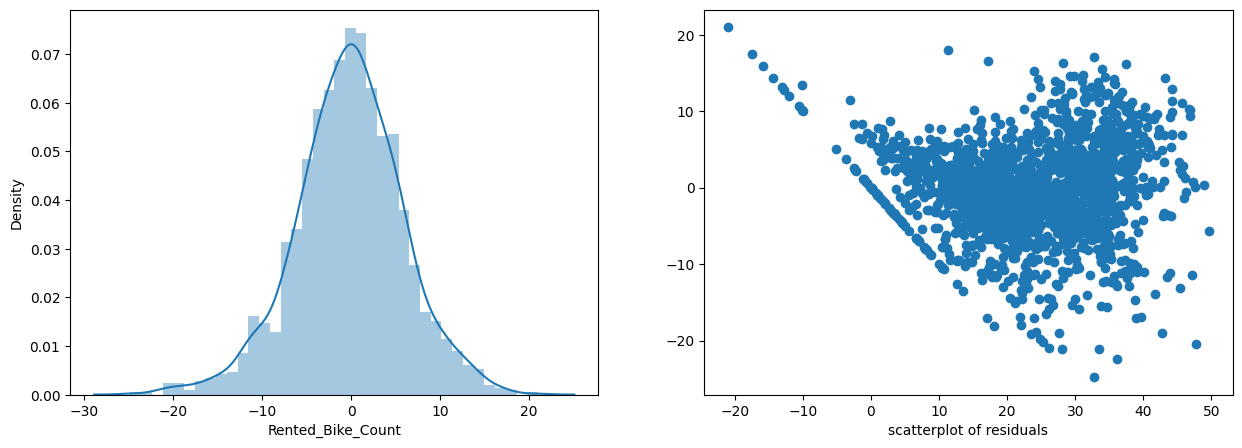

In [ ]:
#Heteroscedasticity
Heteroscedasticity(y_test,y_pred_test)

* Our **Ridge Regression model** is performing well on train dataset as we can see from **R2 score(0.75) and adjusted R2 score(0.74)**.
* the **R^2 of test dataset** is pretty much high i.e. **0.76** and **adjusted R^2 of test dataset** is nearly same to R^2 i.e. **0.76**. means our model is performing well on test dataset.
* Heteroscedasticity is a problem because ordinary least squares (OLS) regression assumes that **all residuals are drawn from a population that has a constant variance (homoscedasticity)**. To satisfy the regression assumptions and be able to trust the results, **the residuals should have a constant variance**.
* here, we can see, our model is performing well on the dataset.

##**Decision Tree**

In [ ]:
dt = DecisionTreeRegressor(random_state=0)
dt_params = {'max_depth':np.arange(1,50,2),'min_samples_leaf':np.arange(2,15)}

from sklearn.model_selection import GridSearchCV
gs_dt = GridSearchCV(dt,dt_params,cv=3)
gs_dt.fit(x_train,y_train)
a = gs_dt.best_params_

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(max_depth=a['max_depth'],min_samples_leaf= a['min_samples_leaf'])
model = dtr.fit(x_train,y_train)

In [ ]:
#get the y_pred_train and y_pred_test value
y_pred_train=model.predict(x_train)
y_pred_test=model.predict(x_test)

In [ ]:
#Calculating metric value for testing dataset
print('Metric value of training dataset')
#Calculate MSE
MSE_dt = mean_squared_error(y_train, y_pred_train)    
print("MSE :",MSE_dt)
#calculate RMSE 
RMSE_dt = np.sqrt(MSE_dt)   
print("RMSE :",RMSE_dt)
#calculate MAE 
MAE_dt = mean_absolute_error(y_train, y_pred_train)       
print("MAE :",MAE_dt)
#calculate r2 and adjusted r2
r2_dt = r2_score(y_train, y_pred_train)         
print("R2 :",r2_dt)
Adjusted_r2_dt = 1-(((1-r2_dt)*(x_test.shape[0]-1))/(x_test.shape[0]-x_test.shape[1]-1))
print("Adjusted R2 :",Adjusted_r2_dt)
#creating table of metric values
dict1={'Model':'Decision Tree Regression',
       'MAE':round((MAE_dt),3),
       'MSE':round((MSE_dt),3),
       'RMSE':round((RMSE_dt),3),
       'R2_score':round((r2_dt),3),
       'Adjusted R2':round((Adjusted_r2_dt),3)
        }
training_df = training_df.append(dict1,ignore_index=True)

#Calculating metric value for testing dataset
#calculate MSE
print('Metric value of testing dataset')
MSE_dt = mean_squared_error(y_test, y_pred_test)    
print("MSE :",MSE_dt)
#calculate RMSE 
RMSE_dt = np.sqrt(MSE_dt)   
print("RMSE :",RMSE_dt)
#calculate MAE 
MAE_dt = mean_absolute_error(y_test, y_pred_test)       
print("MAE :",MAE_dt)
#calculate r2 and adjusted r2
r2_dt = r2_score(y_test, y_pred_test)         
print("R2 :",r2_dt)
Adjusted_r2_dt = 1-(((1-r2_dt)*(x_test.shape[0]-1))/(x_test.shape[0]-x_test.shape[1]-1))
print("Adjusted R2 :",Adjusted_r2_dt)
#creating table of metric values
dict2={'Model':'Decision Tree Regression',
       'MAE':round((MAE_dt),3),
       'MSE':round((MSE_dt),3),
       'RMSE':round((RMSE_dt),3),
       'R2_score':round((r2_dt),3),
       'Adjusted R2':round((Adjusted_r2_dt),3)
        }
testing_df = testing_df.append(dict2,ignore_index=True)

Metric value of training dataset
MSE : 8.662600509132098
RMSE : 2.943229605235055
MAE : 1.9226902448665613
R2 : 0.9438707624119747
Adjusted R2 : 0.9426256304631452
Metric value of testing dataset
MSE : 21.674558096346637
RMSE : 4.655594279610997
MAE : 3.0055389391783884
R2 : 0.8623717492255445
Adjusted R2 : 0.8593186998797013


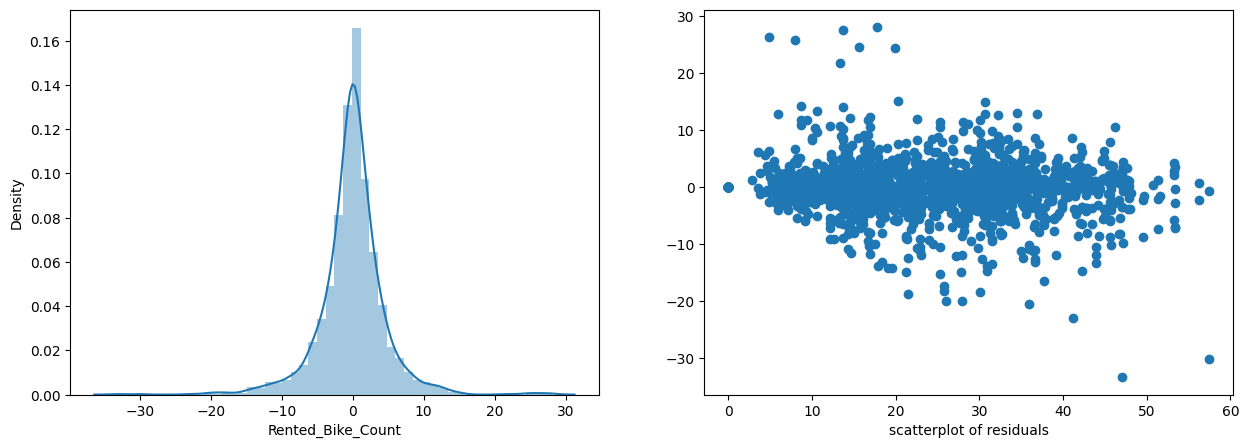

In [ ]:
#Heteroscedasticity
Heteroscedasticity(y_test,y_pred_test)

* Our **Decision Tree regressor model** is performing well on train dataset as we can see from **R2 score(0.94) and adjusted R2 score(0.94)**.
* the **R^2 of test dataset** is pretty much high i.e. **0.86** and **adjusted R^2 of test dataset** is nearly same to R^2 i.e. **0.86**. means our model is performing well on test dataset.
* Heteroscedasticity is a problem because ordinary least squares (OLS) regression assumes that **all residuals are drawn from a population that has a constant variance (homoscedasticity)**. To satisfy the regression assumptions and be able to trust the results, **the residuals should have a constant variance**.
* here, we can see, our model is performing well on the dataset.

##**Random Forest**

In [ ]:
#import the packages
from sklearn.ensemble import RandomForestRegressor
# Create an instance of the RandomForestRegressor
rf_model = RandomForestRegressor()
rf_model.fit(x_train,y_train)

RandomForestRegressor()

In [ ]:
#get the y predicted value for train and test dataset
y_pred_train = rf_model.predict(x_train)
y_pred_test = rf_model.predict(x_test)

In [ ]:
#Calculating metric value for testing dataset
print('Metric value of training dataset')
#Calculate MSE
MSE_rf = mean_squared_error(y_train, y_pred_train)    
print("MSE :",MSE_rf)
#calculate RMSE 
RMSE_rf = np.sqrt(MSE_rf)   
print("RMSE :",RMSE_rf)
#calculate MAE 
MAE_rf = mean_absolute_error(y_train, y_pred_train)       
print("MAE :",MAE_rf)
#calculate r2 and adjusted r2
r2_rf = r2_score(y_train, y_pred_train)         
print("R2 :",r2_rf)
Adjusted_r2_rf = 1-(((1-r2_rf)*(x_test.shape[0]-1))/(x_test.shape[0]-x_test.shape[1]-1))
print("Adjusted R2 :",Adjusted_r2_rf)
#creating table of metric values
dict1={'Model':'Random Forest',
       'MAE':round((MAE_rf),3),
       'MSE':round((MSE_rf),3),
       'RMSE':round((RMSE_rf),3),
       'R2_score':round((r2_rf),3),
       'Adjusted R2':round((Adjusted_r2_rf),3)
        }
training_df = training_df.append(dict1,ignore_index=True)

#Calculating metric value for testing dataset
#calculate MSE
print('Metric value of testing dataset')
MSE_rf = mean_squared_error(y_test, y_pred_test)    
print("MSE :",MSE_rf)
#calculate RMSE 
RMSE_rf = np.sqrt(MSE_rf)   
print("RMSE :",RMSE_rf)
#calculate MAE 
MAE_rf = mean_absolute_error(y_test, y_pred_test)       
print("MAE :",MAE_rf)
#calculate r2 and adjusted r2
r2_rf = r2_score(y_test, y_pred_test)         
print("R2 :",r2_rf)
Adjusted_r2_rf = 1-(((1-r2_rf)*(x_test.shape[0]-1))/(x_test.shape[0]-x_test.shape[1]-1))
print("Adjusted R2 :",Adjusted_r2_rf)
#creating table of metric values
dict2={'Model':'Random Forest',
       'MAE':round((MAE_rf),3),
       'MSE':round((MSE_rf),3),
       'RMSE':round((RMSE_rf),3),
       'R2_score':round((r2_rf),3),
       'Adjusted R2':round((Adjusted_r2_rf),3)
        }
testing_df = testing_df.append(dict2,ignore_index=True)

Metric value of training dataset
MSE : 1.7052236392371467
RMSE : 1.3058421188019427
MAE : 0.8338019599168621
R2 : 0.9889510196520596
Adjusted R2 : 0.9887059167605116
Metric value of testing dataset
MSE : 13.525224713996064
RMSE : 3.6776656609860643
MAE : 2.286783934911105
R2 : 0.9141180636558182
Adjusted R2 : 0.912212918541353


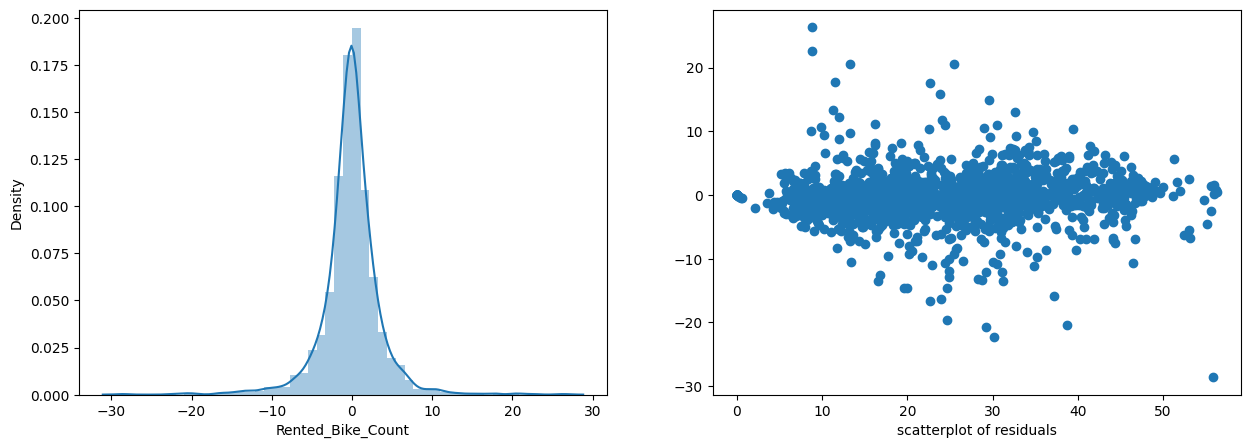

In [ ]:
#Heteroscedasticity
Heteroscedasticity(y_test,y_pred_test)

* Our **Random Forest model** is performing well on train dataset as we can see from **R2 score(0.99) and adjusted R2 score(0.99)**.
* the **R^2 of test dataset** is pretty much high i.e. **0.91** and **adjusted R^2 of test dataset** is nearly same to R^2 i.e. **0.91**. means our model is performing well on test dataset.
* Heteroscedasticity is a problem because ordinary least squares (OLS) regression assumes that **all residuals are drawn from a population that has a constant variance (homoscedasticity)**. To satisfy the regression assumptions and be able to trust the results, **the residuals should have a constant variance**.
* here, we can see, our model is performing well on the dataset.

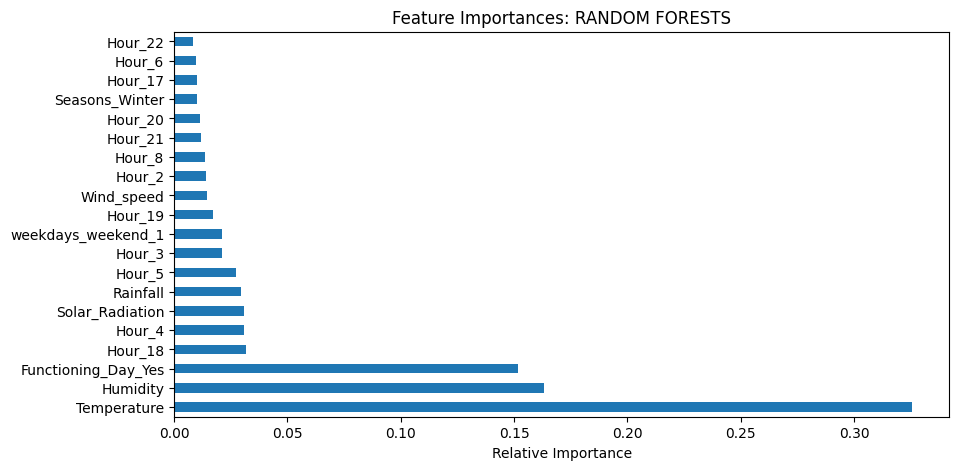

In [ ]:
# Feature importances
rf_feat_imp = pd.Series(rf_model.feature_importances_, index=x.columns)
plt.figure(figsize=(10,5))
plt.title('Feature Importances: RANDOM FORESTS')
plt.xlabel('Relative Importance')
rf_feat_imp.nlargest(20).plot(kind='barh');

Here, we can see that, **Functioning Day, Temperature, and Humidity** has much **higher relevance** on the counting of bike Renting. means they are most important features which affects on rented bike count in the **Random Forest model.**

##**Gradient Boosting**

In [ ]:
#import the packages
from sklearn.ensemble import GradientBoostingRegressor
# Create an instance of the GradientBoostingRegressor
gradient_boosting_regressor = GradientBoostingRegressor()
gradient_boosting_regressor.fit(x_train,y_train)

GradientBoostingRegressor()

In [ ]:
#get the y predicted value for train and test dataset
y_pred_train=gradient_boosting_regressor.predict(x_train)
y_pred_test=gradient_boosting_regressor.predict(x_test)

In [ ]:
#Calculating metric value for testing dataset
print('Metric value of training dataset')
#Calculate MSE
MSE_gb = mean_squared_error(y_train, y_pred_train)    
print("MSE :",MSE_gb)
#calculate RMSE 
RMSE_gb = np.sqrt(MSE_gb)   
print("RMSE :",RMSE_gb)
#calculate MAE 
MAE_gb = mean_absolute_error(y_train, y_pred_train)       
print("MAE :",MAE_gb)
#calculate r2 and adjusted r2
r2_gb = r2_score(y_train, y_pred_train)         
print("R2 :",r2_gb)
Adjusted_r2_gb = 1-(((1-r2_gb)*(x_test.shape[0]-1))/(x_test.shape[0]-x_test.shape[1]-1))
print("Adjusted R2 :",Adjusted_r2_gb)
#creating table of metric values
dict1={'Model':'Gradient Boosting Regressor',
       'MAE':round((MAE_gb),3),
       'MSE':round((MSE_gb),3),
       'RMSE':round((RMSE_gb),3),
       'R2_score':round((r2_gb),3),
       'Adjusted R2':round((Adjusted_r2_gb),3)
        }
training_df = training_df.append(dict1,ignore_index=True)

#Calculating metric value for testing dataset
#calculate MSE
print('Metric value of testing dataset')
MSE_gb = mean_squared_error(y_test, y_pred_test)    
print("MSE :",MSE_gb)
#calculate RMSE 
RMSE_gb = np.sqrt(MSE_gb)   
print("RMSE :",RMSE_gb)
#calculate MAE 
MAE_gb = mean_absolute_error(y_test, y_pred_test)       
print("MAE :",MAE_gb)
#calculate r2 and adjusted r2
r2_gb = r2_score(y_test, y_pred_test)         
print("R2 :",r2_gb)
Adjusted_r2_gb = 1-(((1-r2_gb)*(x_test.shape[0]-1))/(x_test.shape[0]-x_test.shape[1]-1))
print("Adjusted R2 :",Adjusted_r2_gb)
#creating table of metric values
dict2={'Model':'Gradient Boosting Regressor',
       'MAE':round((MAE_gb),3),
       'MSE':round((MSE_gb),3),
       'RMSE':round((RMSE_gb),3),
       'R2_score':round((r2_gb),3),
       'Adjusted R2':round((Adjusted_r2_gb),3)
        }
testing_df = testing_df.append(dict2,ignore_index=True)

Metric value of training dataset
MSE : 19.449651860691695
RMSE : 4.410175944414428
MAE : 3.3231332921551218
R2 : 0.8739761658012184
Adjusted R2 : 0.8711805407576961
Metric value of testing dataset
MSE : 21.81179116114723
RMSE : 4.670309535903079
MAE : 3.494758853453412
R2 : 0.8615003521445536
Adjusted R2 : 0.8584279723322319


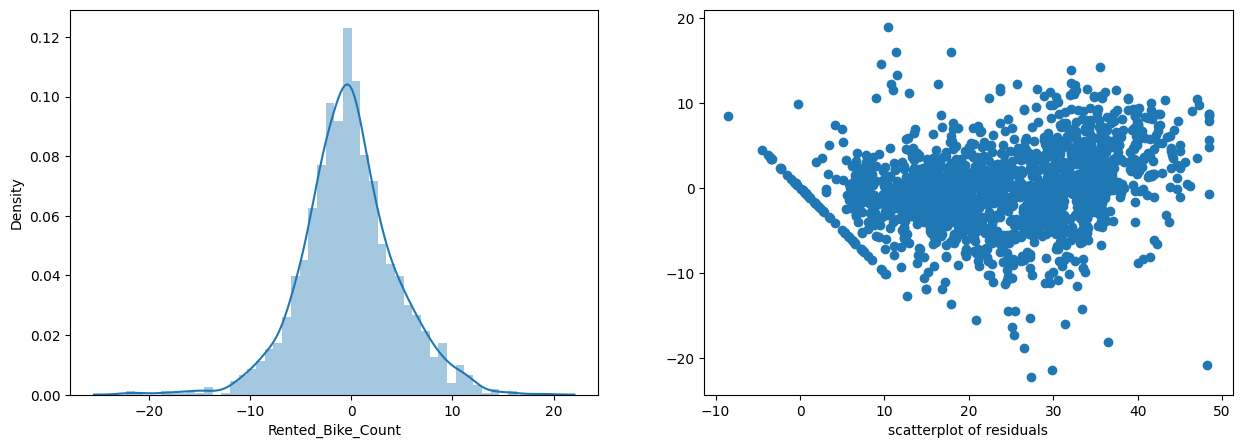

In [ ]:
#Heteroscedasticity
Heteroscedasticity(y_test,y_pred_test)

* Our **Gradient Boosting model** is performing better on train dataset as we can see from **R2 score(0.87) and adjusted R2 score(0.87)**.
* the **R^2 of test dataset** is pretty much high i.e. **0.86** and **adjusted R^2 of test dataset** is nearly same to R^2 i.e. **0.86**. means our model is performing well on test dataset.
* Heteroscedasticity is a problem because ordinary least squares (OLS) regression assumes that **all residuals are drawn from a population that has a constant variance (homoscedasticity)**. To satisfy the regression assumptions and be able to trust the results, **the residuals should have a constant variance**.
* here, we can see, our model is performing well on the dataset.


##**Hyper parameter Tuning:**
* **GridSearchCV**


###**Gradient Boosting with GridSearchCV**

**Provide the range of values for chosen hyperparameters**

In [ ]:
# Number of trees
n_estimators = [50,80,100]

# Maximum depth of trees
max_depth = [4,6,8,10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [30,40,50]

# HYperparameter Grid
param_dict = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_leaf' : min_samples_leaf}

In [ ]:
from sklearn.model_selection import GridSearchCV
# Create an instance of the GradientBoostingRegressor
gb_model = GradientBoostingRegressor()

# Grid search
gradient_boosting_gridsearchcv = GridSearchCV(estimator=gb_model,
                       param_grid = param_dict,
                       cv = 5)
gradient_boosting_gridsearchcv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'max_depth': [4, 6, 8, 10],
                         'min_samples_leaf': [30, 40, 50],
                         'n_estimators': [50, 80, 100]})

In [ ]:
gb_optimal_model = gradient_boosting_gridsearchcv.best_estimator_

In [ ]:
#get the y predicted value for train and test dataset
y_pred_train = gb_optimal_model.predict(x_train)
y_pred_test = gb_optimal_model.predict(x_test)

In [ ]:
gradient_boosting_gridsearchcv = gradient_boosting_gridsearchcv.best_estimator_
gradient_boosting_gridsearchcv

GradientBoostingRegressor(max_depth=10, min_samples_leaf=30)

In [ ]:
#Calculating metric value for testing dataset
print('Metric value of training dataset')
#Calculate MSE
MSE_gbgs = mean_squared_error(y_train, y_pred_train)    
print("MSE :",MSE_gbgs)
#calculate RMSE 
RMSE_gbgs = np.sqrt(MSE_gbgs)   
print("RMSE :",RMSE_gbgs)
#calculate MAE 
MAE_gbgs = mean_absolute_error(y_train, y_pred_train)       
print("MAE :",MAE_gbgs)
#calculate r2 and adjusted r2
r2_gbgs = r2_score(y_train, y_pred_train)         
print("R2 :",r2_gbgs)
Adjusted_r2_gbgs = 1-(((1-r2_gbgs)*(x_test.shape[0]-1))/(x_test.shape[0]-x_test.shape[1]-1))
print("Adjusted R2 :",Adjusted_r2_gbgs)
#creating table of metric values
dict1={'Model':'Gradient Boosting Regressor with GridSearchCV',
       'MAE':round((MAE_gbgs),3),
       'MSE':round((MSE_gbgs),3),
       'RMSE':round((RMSE_gbgs),3),
       'R2_score':round((r2_gbgs),3),
       'Adjusted R2':round((Adjusted_r2_gbgs),3)
        }
training_df = training_df.append(dict1,ignore_index=True)

#Calculating metric value for testing dataset
#calculate MSE
print('Metric value of testing dataset')
MSE_gbgs = mean_squared_error(y_test, y_pred_test)    
print("MSE :",MSE_gbgs)
#calculate RMSE 
RMSE_gbgs = np.sqrt(MSE_gbgs)   
print("RMSE :",RMSE_gbgs)
#calculate MAE 
MAE_gbgs = mean_absolute_error(y_test, y_pred_test)       
print("MAE :",MAE_gbgs)
#calculate r2 and adjusted r2
r2_gbgs = r2_score(y_test, y_pred_test)         
print("R2 :",r2_gbgs)
Adjusted_r2_gbgs = 1-(((1-r2_gbgs)*(x_test.shape[0]-1))/(x_test.shape[0]-x_test.shape[1]-1))
print("Adjusted R2 :",Adjusted_r2_gbgs)
#creating table of metric values
dict2={'Model':'Gradient Boosting Regressor with GridSearchCV',
       'MAE':round((MAE_gbgs),3),
       'MSE':round((MSE_gbgs),3),
       'RMSE':round((RMSE_gbgs),3),
       'R2_score':round((r2_gbgs),3),
       'Adjusted R2':round((Adjusted_r2_gbgs),3)
        }
testing_df = testing_df.append(dict2,ignore_index=True)

Metric value of training dataset
MSE : 6.340400530634246
RMSE : 2.5180151966646758
MAE : 1.691238900051521
R2 : 0.958917435080604
Adjusted R2 : 0.9580060880479496
Metric value of testing dataset
MSE : 12.322511160106181
RMSE : 3.510343453297153
MAE : 2.2972131751834173
R2 : 0.9217550065576664
Adjusted R2 : 0.9200192740703291


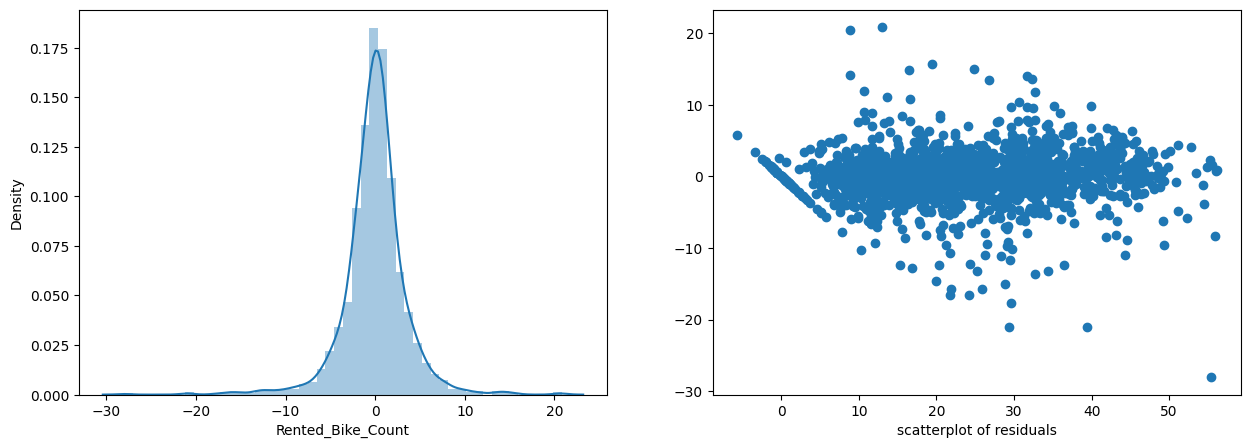

In [ ]:
#Heteroscedasticity
Heteroscedasticity(y_test,y_pred_test)

* Our **Gradient Boosting with GridSearchCV model** is performing best on train dataset as we can see from **R2 score(0.96) and adjusted R2 score(0.96)**.
* the **R^2 of test dataset** is pretty much high i.e.**0.92** and **adjusted R^2 of test dataset** is nearly same to R^2 i.e.**0.92**. means our model is performing well on test dataset.
* Heteroscedasticity is a problem because ordinary least squares (OLS) regression assumes that **all residuals are drawn from a population that has a constant variance (homoscedasticity)**. To satisfy the regression assumptions and be able to trust the results, **the residuals should have a constant variance**.
* here, we can see, our model is performing well on the dataset.

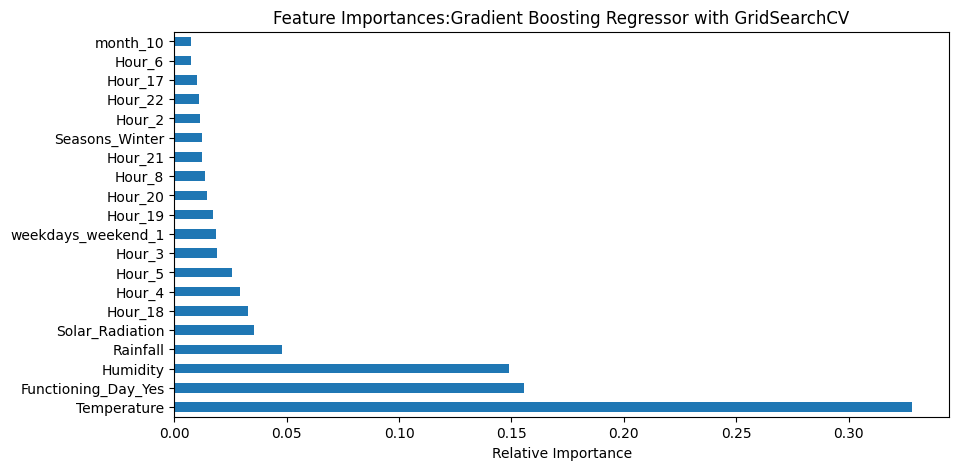

In [ ]:
# Feature importances

gb_grid_feat_imp = pd.Series(gb_optimal_model.feature_importances_, index=x.columns)
plt.figure(figsize=(10,5))
plt.title('Feature Importances:Gradient Boosting Regressor with GridSearchCV')
plt.xlabel('Relative Importance')
gb_grid_feat_imp.nlargest(20).plot(kind='barh');

Here, we can see that, **Functioning Day, Temperature, and Humidity** has much **higher relevance** on the counting of bike Renting. means they are most important features which affects on rented bike count in the **Gradient Boosting with GridSearchCV model.**



##**XgBoost with RandomizedSearchCV**

In [ ]:
#Import Library
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
import xgboost

In [ ]:
#hyperparameter optimization
params = {'learning_rate' : [0.05,0.1,0.15,0.2,0.25,0.3],
          'max_depth' : [3,4,5,6,8,10,12,15],
          'min_child_weight' : [1,3,5,7],
          'gamma' : [0,0.1,0.2,0.3,0.4],
          'colsample_bytree' : [0.3,0.4,0.5,0.7]
} 

In [ ]:
xgb_regressor = xgboost.XGBRegressor()
random_search = RandomizedSearchCV(xgb_regressor, param_distributions=params, n_iter=5, scoring='neg_mean_squared_error',n_jobs=-1,cv=5,verbose=3)

In [ ]:
random_search.fit(x_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, gpu_id=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                          monotone_constraints=None,
                                          n_estimators=100, n_jobs=None,
                                          num_parallel_tree=None,
                                          predictor=None, random_state=None, ...),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.5,
                                                             0.7],
                                        'gamma': [0, 0.1, 0.2, 0.3, 0.4],
                                        'learning_rate': [0.05, 0.1, 0.15, 0.2,
                                                          0.25, 0.3],
                                        'max_depth': [3, 4, 5, 6, 8, 10, 12,
                                                      15],
                                        'min_child_weight': [1, 3, 5, 7]},
                   scoring='neg_mean_squared_error', verbose=3)

In [ ]:
xgb_model = random_search.best_estimator_
xgb_model

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.5, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0.2, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=3, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [ ]:
random_search.best_params_

{'min_child_weight': 3,
 'max_depth': 6,
 'learning_rate': 0.1,
 'gamma': 0.2,
 'colsample_bytree': 0.5}

In [ ]:
#get the y predicted value for train and test dataset
y_pred_train = xgb_model.predict(x_train)
y_pred_test = xgb_model.predict(x_test)

In [ ]:
#Calculating metric value for testing dataset
print('Metric value of training dataset')
#Calculate MSE
MSE_xgb = mean_squared_error(y_train, y_pred_train)    
print("MSE :",MSE_xgb)
#calculate RMSE 
RMSE_xgb = np.sqrt(MSE_xgb)   
print("RMSE :",RMSE_xgb)
#calculate MAE 
MAE_xgb = mean_absolute_error(y_train, y_pred_train)       
print("MAE :",MAE_xgb)
#calculate r2 and adjusted r2
r2_xgb = r2_score(y_train, y_pred_train)         
print("R2 :",r2_xgb)
Adjusted_r2_xgb = 1-(((1-r2_xgb)*(x_test.shape[0]-1))/(x_test.shape[0]-x_test.shape[1]-1))
print("Adjusted R2 :",Adjusted_r2_xgb)
#creating table of metric values
dict1={'Model':'XgBoost Regressor with GridSearchCV',
       'MAE':round((MAE_xgb),3),
       'MSE':round((MSE_xgb),3),
       'RMSE':round((RMSE_xgb),3),
       'R2_score':round((r2_xgb),3),
       'Adjusted R2':round((Adjusted_r2_xgb),3)
        }
training_df = training_df.append(dict1,ignore_index=True)

#Calculating metric value for testing dataset
#calculate MSE
print('Metric value of testing dataset')
MSE_xgb = mean_squared_error(y_test, y_pred_test)    
print("MSE :",MSE_xgb)
#calculate RMSE 
RMSE_xgb = np.sqrt(MSE_xgb)   
print("RMSE :",RMSE_xgb)
#calculate MAE 
MAE_xgb = mean_absolute_error(y_test, y_pred_test)       
print("MAE :",MAE_xgb)
#calculate r2 and adjusted r2
r2_xgb = r2_score(y_test, y_pred_test)         
print("R2 :",r2_xgb)
Adjusted_r2_xgb = 1-(((1-r2_xgb)*(x_test.shape[0]-1))/(x_test.shape[0]-x_test.shape[1]-1))
print("Adjusted R2 :",Adjusted_r2_xgb)
#creating table of metric values
dict2={'Model':'XgBoost Regressor with GridSearchCV',
       'MAE':round((MAE_xgb),3),
       'MSE':round((MSE_xgb),3),
       'RMSE':round((RMSE_xgb),3),
       'R2_score':round((r2_xgb),3),
       'Adjusted R2':round((Adjusted_r2_xgb),3)
        }
testing_df = testing_df.append(dict2,ignore_index=True)

Metric value of training dataset
MSE : 9.152476657826368
RMSE : 3.025306043663412
MAE : 2.1231699536216255
R2 : 0.9406966145669042
Adjusted R2 : 0.9393810695310271
Metric value of testing dataset
MSE : 13.645126092982041
RMSE : 3.6939309810799172
MAE : 2.5852397499283075
R2 : 0.9133567186271475
Adjusted R2 : 0.9114346843643522


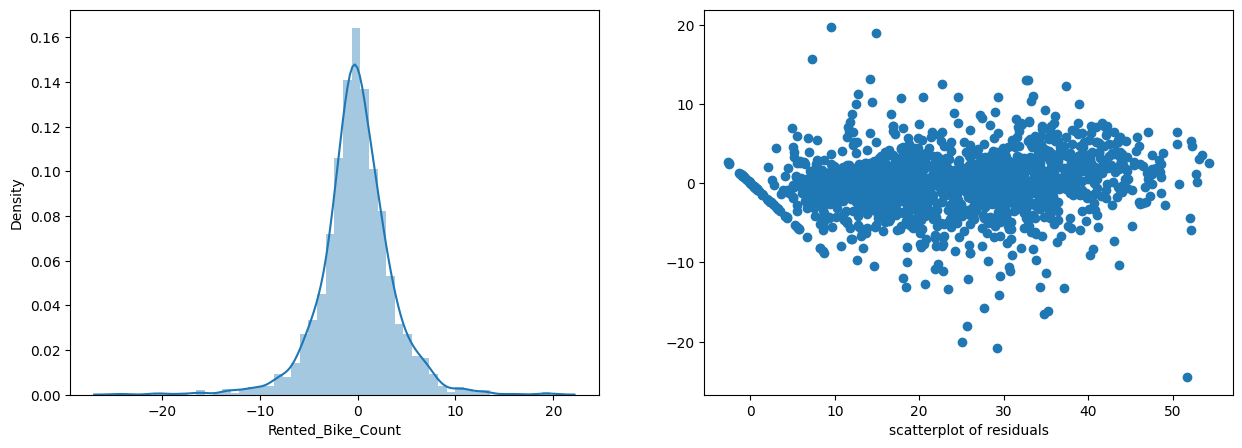

In [ ]:
#Heteroscedasticity
Heteroscedasticity(y_test,y_pred_test)

* Our **XgBoost with RandomizedSearchCV model** is performing best on train dataset as we can see from **R2 score(0.94) and adjusted R2 score(0.94)**.
* the **R^2 of test dataset** is much high i.e.**0.91** and **adjusted R^2 of test dataset** is nearly same to R^2 i.e.**0.91**. means our model is performing better on test dataset.
* Heteroscedasticity is a problem because ordinary least squares (OLS) regression assumes that **all residuals are drawn from a population that has a constant variance (homoscedasticity)**. To satisfy the regression assumptions and be able to trust the results, **the residuals should have a constant variance**.
* here, we can see, our model is performing well on the dataset.

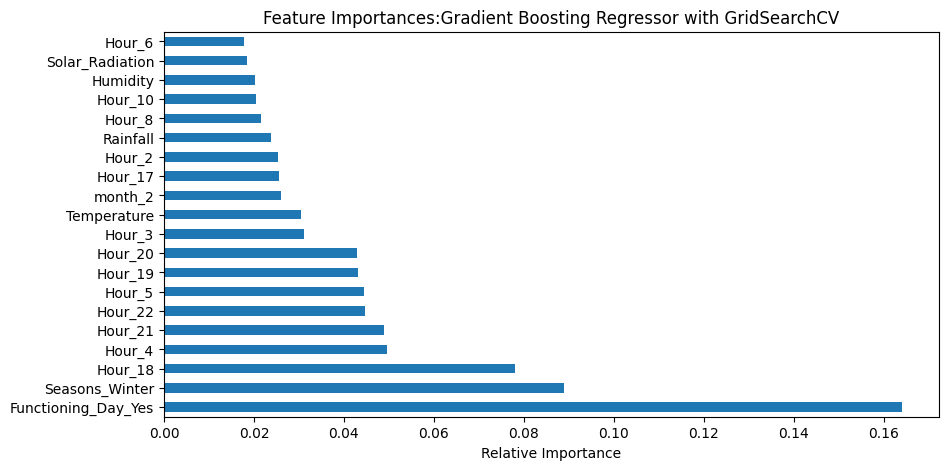

In [ ]:
# Feature importances

xgb_grid_feat_imp = pd.Series(xgb_model.feature_importances_, index=x.columns)
plt.figure(figsize=(10,5))
plt.title('Feature Importances:Gradient Boosting Regressor with GridSearchCV')
plt.xlabel('Relative Importance')
xgb_grid_feat_imp.nlargest(20).plot(kind='barh');

Here, we can see that, **Functioning Day, Winter Season, and 18 Hour i.e. 6 p.m.** has much **higher relevance** on the counting of bike Renting. means they are most important features which affects on rented bike count in the **XgBoost with RandomizedSearchCV model.**

#**9. Results**

In [ ]:
# displaying the results of evaluation metric values for all models
result=pd.concat([training_df,testing_df],keys=['Training set','Testing set'],axis=1)
result

Training set                        \
                                           Model    MAE     MSE   RMSE   
0             Linear regression of train dataset  4.671  38.130  6.175   
1                               Lasso Regression  7.265  91.855  9.584   
2                               Ridge Regression  4.671  38.130  6.175   
3                       Decision Tree Regression  1.923   8.663  2.943   
4                                  Random Forest  0.834   1.705  1.306   
5                    Gradient Boosting Regressor  3.323  19.450  4.410   
6  Gradient Boosting Regressor with GridSearchCV  1.691   6.340  2.518   
7            XgBoost Regressor with GridSearchCV  2.123   9.152  3.025   

                                                          Testing set         \
  R2_score Adjusted R2                                          Model    MAE   
0    0.753       0.747              Linear regression of test dataset  4.660   
1    0.405       0.392                               Lasso Regression  7.454   
2    0.753       0.747                               Ridge Regression  4.660   
3    0.944       0.943                       Decision Tree Regression  3.006   
4    0.989       0.989                                  Random Forest  2.287   
5    0.874       0.871                    Gradient Boosting Regressor  3.495   
6    0.959       0.958  Gradient Boosting Regressor with GridSearchCV  2.297   
7    0.941       0.939            XgBoost Regressor with GridSearchCV  2.585   

                                       
      MSE   RMSE R2_score Adjusted R2  
0  36.888  6.074    0.766       0.761  
1  97.021  9.850    0.384       0.392  
2  36.889  6.074    0.766       0.761  
3  21.675  4.656    0.862       0.859  
4  13.525  3.678    0.914       0.912  
5  21.812  4.670    0.862       0.858  
6  12.323  3.510    0.922       0.920  
7  13.645  3.694    0.913       0.911

• **No overfitting** is seen.

• Random forest Regressor, Gradient Boosting gridsearchcv, XbBoost Regressor with GridSearchCV gives the highest R2 score of 99%, 96%, 94% respectively for Train Set and 91%,92%,91% respectively for Test set.

• Feature Importance value for Random Forest, Gradient Boosting, XgBoost are different.

• We can deploy **Random Forest, Gradient Boosting with GridSearchCV, XgBoost with RandomizedSearchCV** model.

#**10. Model Explainability by LIME**

In [ ]:
# Extract features
float_columns=[]
cat_columns=[]
int_columns=[]

In [ ]:
# Putting features into respective float, cat , int list.
for i in x.columns:
    if x[i].dtype == 'float' : 
        float_columns.append(i)
    elif x[i].dtype == 'int64':
        int_columns.append(i)
    elif x[i].dtype == 'object':
        cat_columns.append(i)

In [ ]:
train_cat_features = x[cat_columns]
train_float_features = x[float_columns]
train_int_features = x[int_columns]

In [ ]:
!pip install lime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 KB 14.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283859 sha256=7551b1e58bc0eef7994715ceafad1deda7feb753dbdc8a9b3b733eca20a1f96e
  Stored in directory: /root/.cache/pip/wheels/ed/d7/c9/5a0130d06d6310bc6cbe55220e6e72dcb8c4eff9a478717066
Successfully built lime


In [ ]:
import lime
import lime.lime_tabular
from __future__ import print_function

In [ ]:
# Create the LIME Explainer
explainer = lime.lime_tabular.LimeTabularExplainer(feature_names = x.columns,
                                                  training_data = np.array(x_train),
                                                  mode='regression')

In [ ]:
# Get the explanation for RandomForest
exp = explainer.explain_instance(data_row = x_test.iloc[24], predict_fn = rf_model.predict)
exp.show_in_notebook(show_table=True)

From LIME black box model, we can see that, **Hour 4,Hour 5,Hour 3,Hour 2, Rainfall has positive impact** and **Hour 18,Hour 19, Hour 8, Hour 21,Hour 20 has negative impact** on rented bike count for **Random Forest Model on 24th observation**.

In [ ]:
# Get the explanation for Gradient Boosting with GridSearchCV
exp = explainer.explain_instance(data_row = x_test.iloc[24], predict_fn = gradient_boosting_gridsearchcv.predict)
exp.show_in_notebook(show_table=True)

From LIME black box model, we can see that, **Hour 4,Hour 5,Hour 3,Hour 2, Rainfall has positive impact** and **Hour 18,Hour 19, Hour 8, Hour 21,Hour 20 has negative impact** on rented bike count for **Gradient Boosting with GridSearchCV Model on 24th observation**.

In [ ]:
# Get the explanation for XGBoost with GridSearchCV
exp = explainer.explain_instance(data_row = x_test.iloc[24], predict_fn = xgb_model.predict)
exp.show_in_notebook(show_table=True)

From LIME black box model, we can see that, **Hour 4,Hour 5,Hour 3,Winter Season, Rainfall has positive impact** and **Hour 18,Hour 19, Hour 8, Hour 21,Hour 20 has negative impact** on rented bike count for **XgBoost with GridSearchCV Model on 24th observation**.

#**11. Summary and conclusions**

###**1. EDA Summary**
* **Count of Rented Bike(dependent variable) : positively skewed**
* **Normally distributed attributes:** 
              - Temperature
              - Humidity.
* **Positively skewed attributes:** 
              - Wind 
              - Solar Radiation 
              - Snowfall 
              - Rainfall
* **Negatively skewed attributes:** 
              - visibility
* **positively correlated variables to the bike rent are :** 
              - Temperature
              - Dew Point Temperature
              - Solar Radiation
              - Hour

* **And most negatively correlated variables are:**
              - Humidity
              - Rainfall
              - Weekdays or Weekends
* The number of bikes rented is on average higher during the rush hours.i.e. at 6 p.m. to 8 p.m.
* The **rented bike counts is higher during the summer and lowest during the winter**.
* The **rented bike count is higher on working days than on non-working days**.
* On a **non-functioning day, no bikes are rented** in all the instances of the data.
* The number of bikes rented on average remains constant throughout Monday - Saturday, it dips on Sunday, and on average, the **rented bike counts is lower on weekends than on weekdays**.
* On regular days, the demand for the bikes is higher during rush hours. **On holidays or weekends, the demand is comparatively lower in the mornings, and is higher in the afternoons**.

**Conclusion after using different models:**

      - No overfitting is seen.
      - Random forest Regressor, Gradient Boosting gridsearchcv, XbBoost Regressor with GridSearchCV gives the highest R2 score of 99%, 96%, 94% respectively for Train Set and 91%,92%,91% respectively for Test set.
      - Feature Importance value for Random Forest, Gradient Boosting, XgBoost are different.
      - We can deploy Random Forest, Gradient Boosting with  GridSearchCV, XgBoost with RandomizedSearchCV model.

**Important Feature which affect the most in the rented bike count:**

    * Functioning Day
    * Winter Season
    * 18th Hour i.e. 6 p.m.
    * Temperature
    * Humidity

**Features wich impact Negatively on Rented Bike Count:**  

    * Hour 4 i.e. 4 a.m.
    * Hour 5 i.e. 5 a.m.
    * Hour 3 i.e. 3 a.m.
    * Winter Season 
    * Rainfall 

**Features wich impact Positively on Rented Bike Count:**

    * Hour 18 i.e. 6 p.m.
    * Hour 19 i.e. 7 p.m.
    * Hour 8 i.e. 8 a.m.
    * Hour 21 i.e. 9 p.m.
    * Hour 20  i.e. 8 p.m.



However, this is not the ultimate end. As **this data is time dependent**, the values of features like **Temperature, Windspeed, Solar Radiation etc., will not always be consistent.** Therefore, there will be scenarios where the model might not perform well. As Machine learning is an exponentially evolving field, we will have to be prepared for all contingencies and also keep checking our model from time to time. Therefore, having a quality knowledge and keeping pace with the ever evolving ML field would surely help one to stay a step ahead in future.